In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [2]:
def collect_layer_wise_losses(d):
    losses = {}
    for layer, results in d.items():
        if layer == "linear":
            continue

        losses[layer] = {}
        
        for k, v in results.items():
            if "test" in k:
                losses[layer][k.replace('_score_test', '')] = 100 - v
                
    return losses

def collect_losses(root_dir):

    depth = 2

    dict_res_roberta = dict()
    dict_res_camem = dict()
    dict_res_xlm = dict()
    
    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) < depth:
            for file_ in files:
                if file_ == "probe_results.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                    
                    folder_name_split = subdir.split(os.sep)[-1].split("_")
                    
                    if len(folder_name_split) == 5: # not pretrained
                        model_type = subdir.split(os.sep)[-1].split("_")[-2]
                        dataset_name = "_".join(folder_name_split[1:-2])
                        pretrained = False
                    else:
                        model_type = subdir.split(os.sep)[-1].split("_")[-1]
                        dataset_name = "_".join(folder_name_split[1:-1])
                        pretrained = True
                    
                                        
                    if model_type == "roberta":
                        if not dataset_name in dict_res_roberta:
                            dict_res_roberta[dataset_name] = {}
                        dict_res_roberta[dataset_name][pretrained] = collect_layer_wise_losses(d)
                    elif model_type == "xlm":
                        if not dataset_name in dict_res_xlm:
                            dict_res_xlm[dataset_name] = {}
                        dict_res_xlm[dataset_name][pretrained] = collect_layer_wise_losses(d)
                    elif model_type == "camem":
                        if not dataset_name in dict_res_camem:
                            dict_res_camem[dataset_name] = {}
                        dict_res_camem[dataset_name][pretrained] = collect_layer_wise_losses(d)

    return dict_res_roberta, dict_res_camem, dict_res_xlm


def divide_en_it_ds(dict_res):
    en_dataset = {}
    it_dataset = {}
    
    for k, v in dict_res.items():
        if "en" in k:
            en_dataset[k] = v
        else:
            it_dataset[k] = v

    return en_dataset, it_dataset

def print_probe_results(dict_res):
    mean_dataset_np = collections.defaultdict(list)
    mean_dataset_p = collections.defaultdict(list)
    
    for dataset, res in dict_res.items(): # cicle over users
        res_d_np = pd.DataFrame(res[False])
        res_d_p = pd.DataFrame(res[True])
                
        for ((feat, row_np), (_, row_p)) in zip(res_d_np.iterrows(), res_d_p.iterrows()):
            mean_dataset_np[feat].append(row_np.to_numpy())
            mean_dataset_p[feat].append(row_p.to_numpy())
            
            print(f"Dataset: {dataset} - Features: {feat}")
            plt.plot(row_np, label="not pretrained")
            plt.plot(row_p, label="pretrained")
            plt.legend()
            plt.show()


    # mean over the users
    for ((feat, row_np), (_, row_p)) in zip(mean_dataset_np.items(), mean_dataset_p.items()):        
        print(f"AVERAGED-Dataset: Features: {feat}")
        x_np = np.mean(np.array(row_np), 0)
        std_np = np.std(np.array(row_np), 0)
        plt.plot(range(len(x_np)), x_np, label="not pretrained")
        plt.fill_between(range(len(x_np)), x_np-std_np, x_np+std_np, alpha=0.2)
        
        x_p = np.mean(np.array(row_p), 0)
        std_p = np.std(np.array(row_p), 0)
        plt.plot(range(len(x_p)), x_p, label="pretrained")
        plt.fill_between(range(len(x_p)), x_p-std_p, x_p+std_p, alpha=0.2)

        plt.legend()
        plt.show()

In [3]:
dict_res_roberta, dict_res_camem, dict_res_xlm = collect_losses("../output")

## ROBERTA Results

Dataset: en_49 - Features: skip


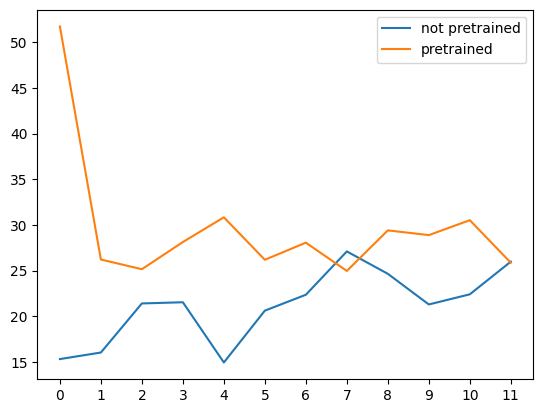

Dataset: en_49 - Features: firstfix_dur


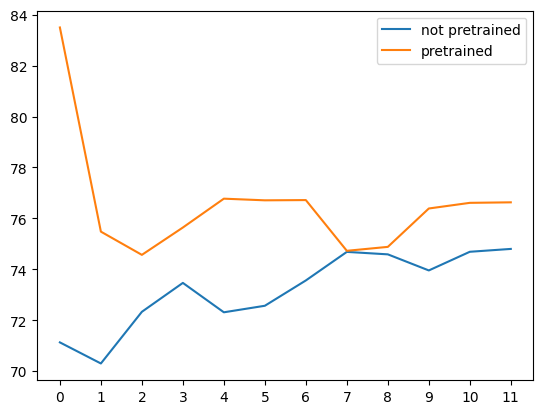

Dataset: en_49 - Features: firstrun_dur


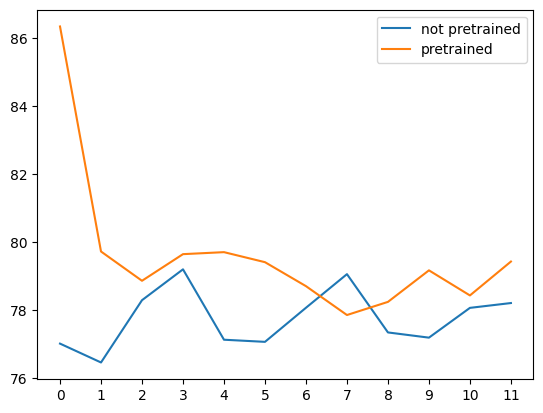

Dataset: en_49 - Features: dur


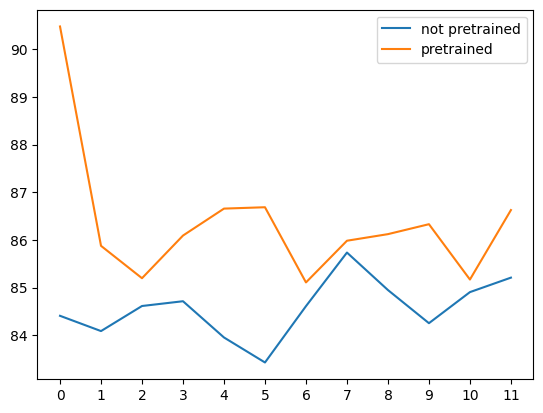

Dataset: en_49 - Features: firstrun_nfix


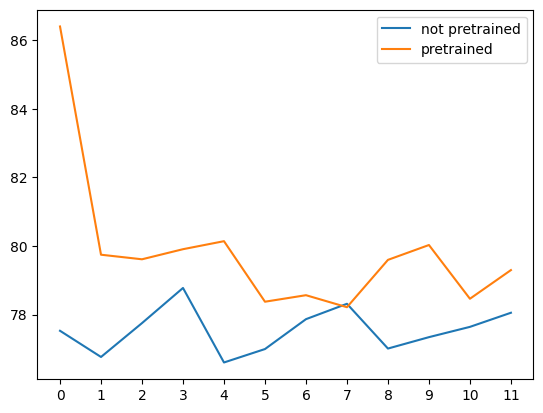

Dataset: en_49 - Features: nfix


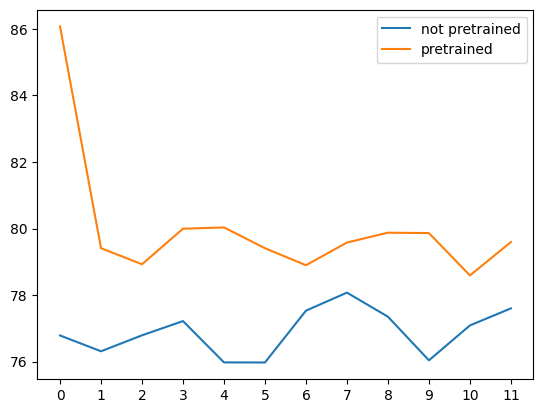

Dataset: en_49 - Features: refix


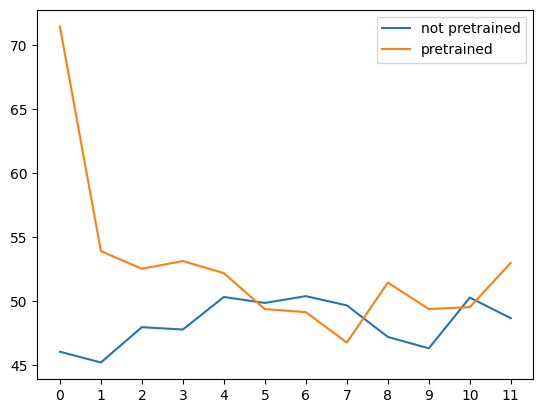

Dataset: en_49 - Features: reread


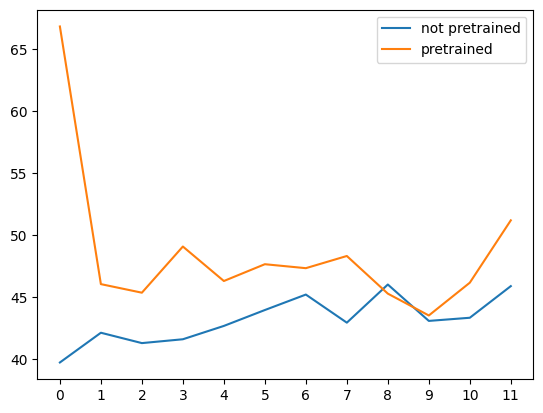

Dataset: en_83 - Features: skip


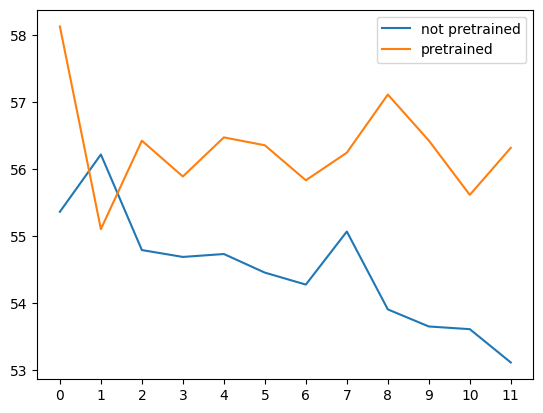

Dataset: en_83 - Features: firstfix_dur


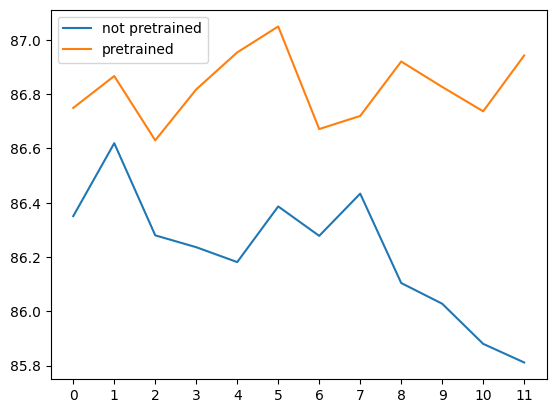

Dataset: en_83 - Features: firstrun_dur


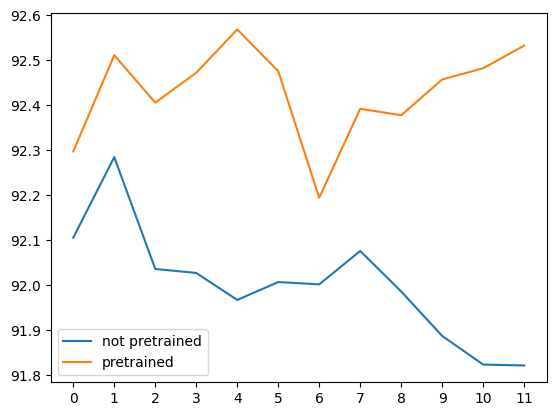

Dataset: en_83 - Features: dur


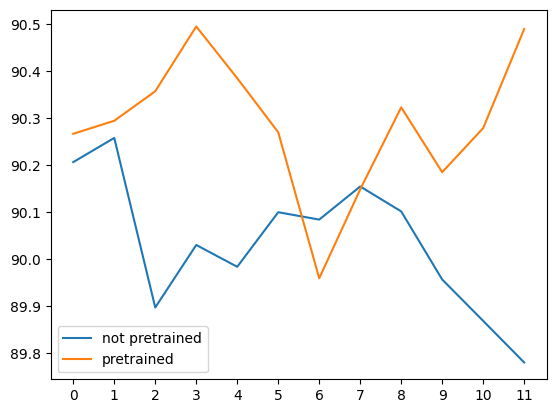

Dataset: en_83 - Features: firstrun_nfix


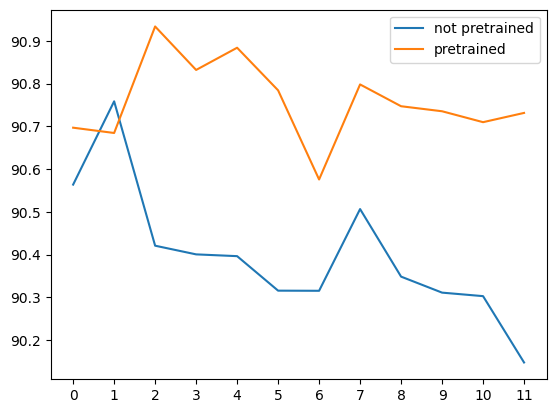

Dataset: en_83 - Features: nfix


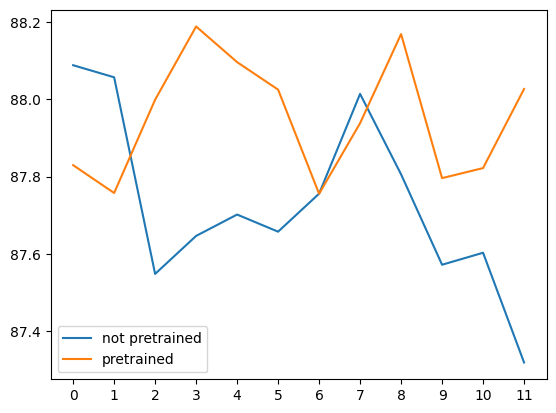

Dataset: en_83 - Features: refix


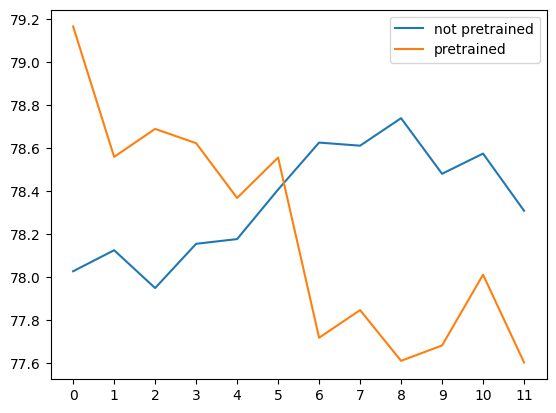

Dataset: en_83 - Features: reread


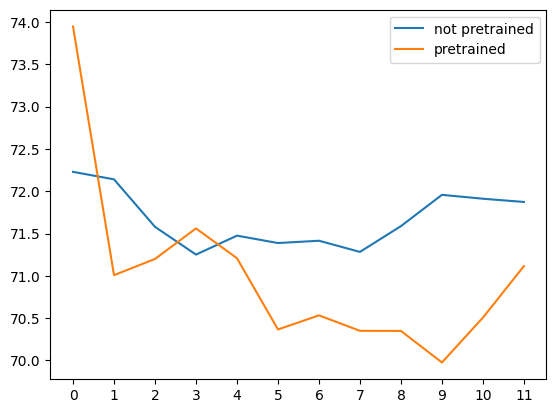

Dataset: en_98 - Features: skip


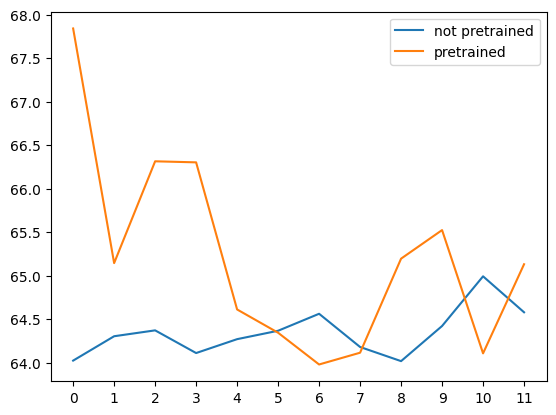

Dataset: en_98 - Features: firstfix_dur


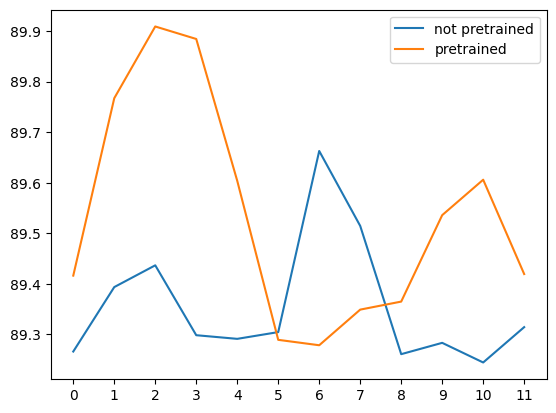

Dataset: en_98 - Features: firstrun_dur


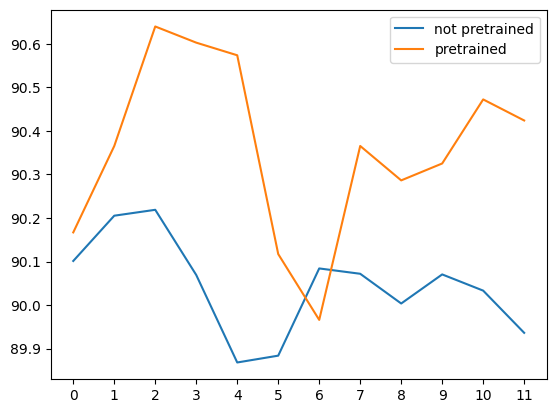

Dataset: en_98 - Features: dur


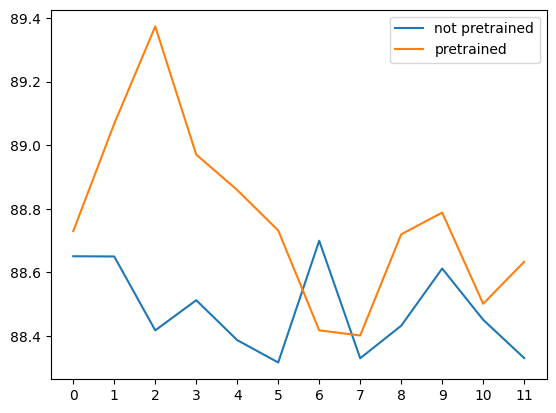

Dataset: en_98 - Features: firstrun_nfix


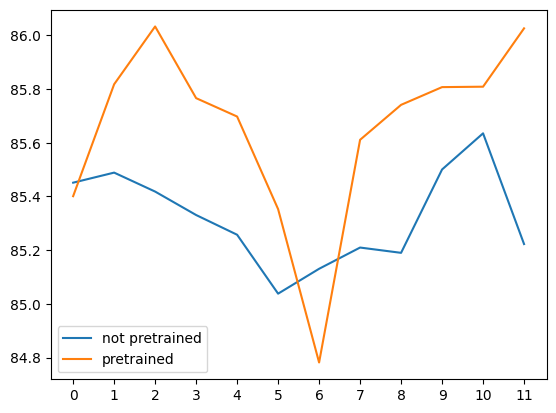

Dataset: en_98 - Features: nfix


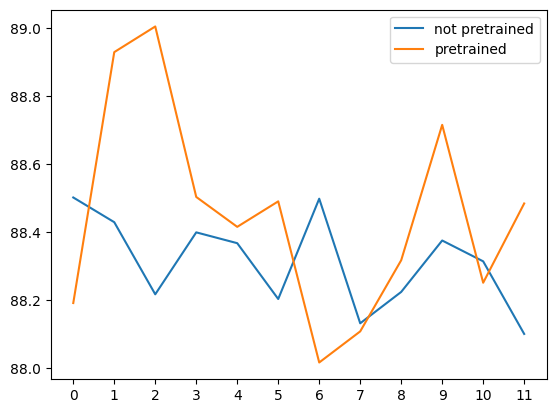

Dataset: en_98 - Features: refix


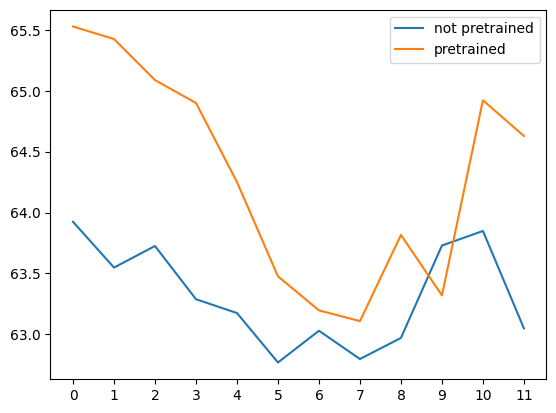

Dataset: en_98 - Features: reread


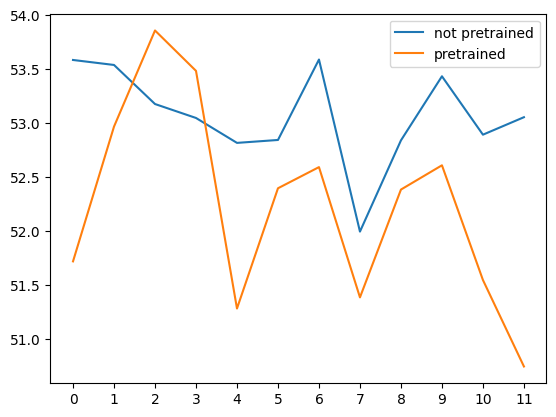

Dataset: en_6 - Features: skip


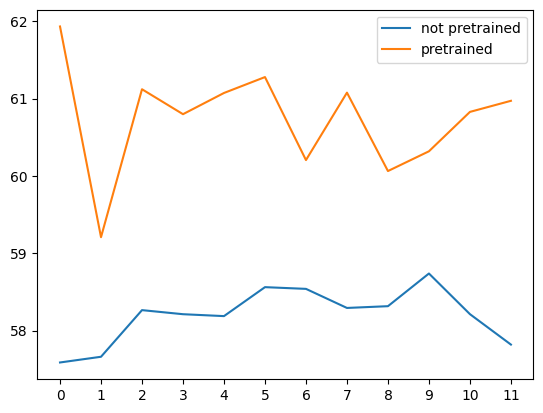

Dataset: en_6 - Features: firstfix_dur


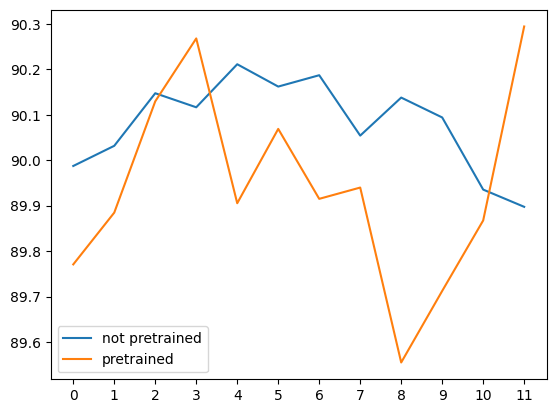

Dataset: en_6 - Features: firstrun_dur


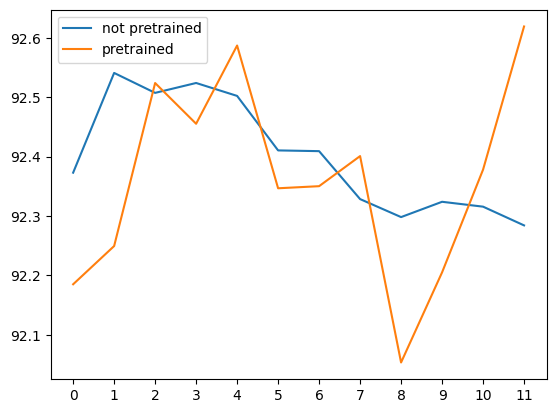

Dataset: en_6 - Features: dur


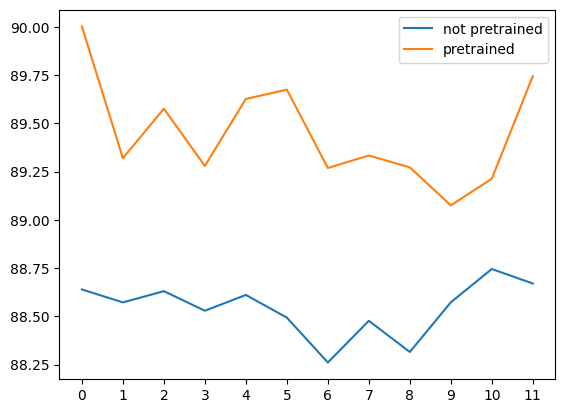

Dataset: en_6 - Features: firstrun_nfix


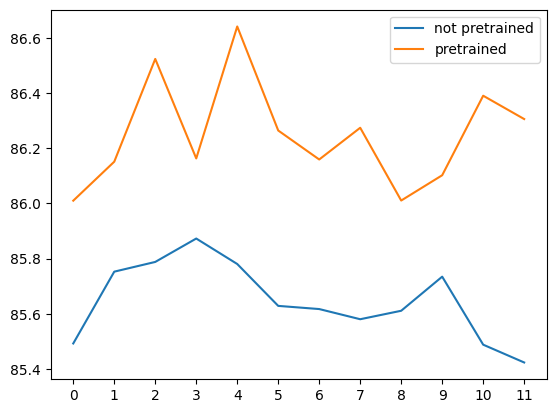

Dataset: en_6 - Features: nfix


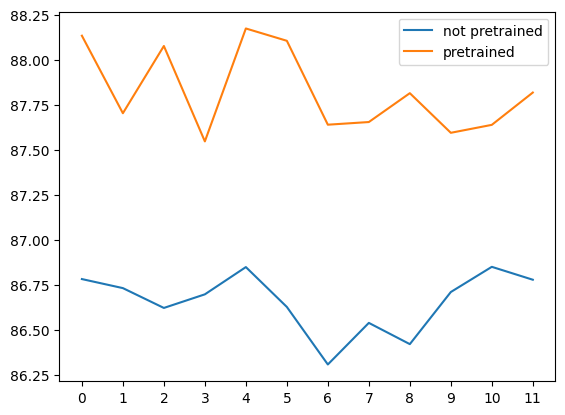

Dataset: en_6 - Features: refix


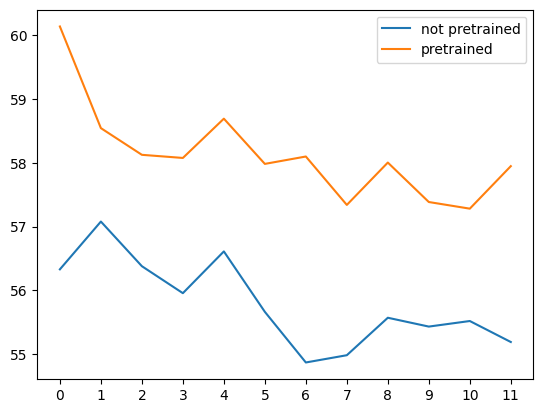

Dataset: en_6 - Features: reread


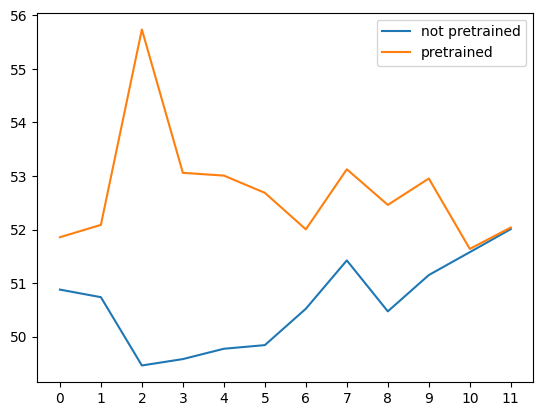

Dataset: en_57 - Features: skip


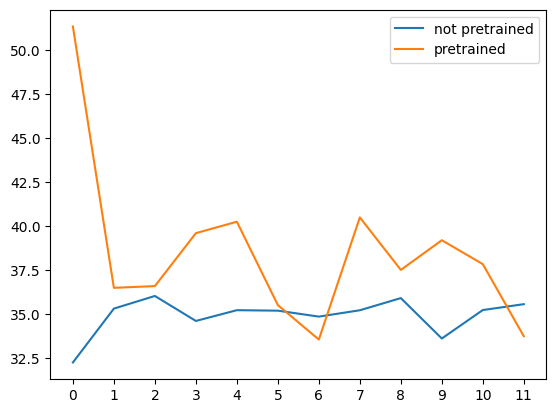

Dataset: en_57 - Features: firstfix_dur


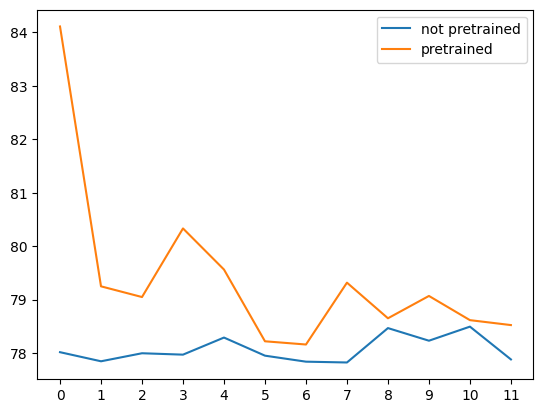

Dataset: en_57 - Features: firstrun_dur


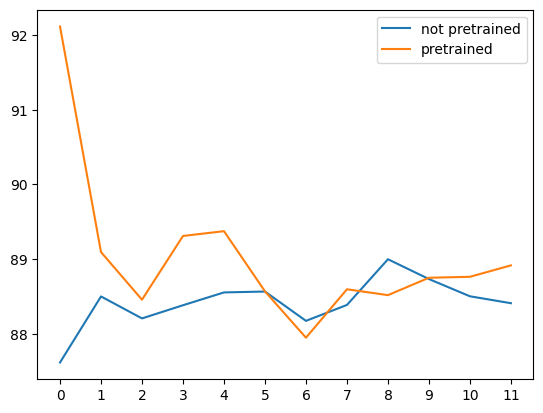

Dataset: en_57 - Features: dur


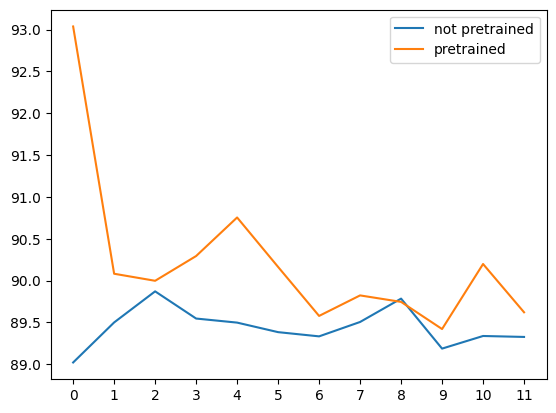

Dataset: en_57 - Features: firstrun_nfix


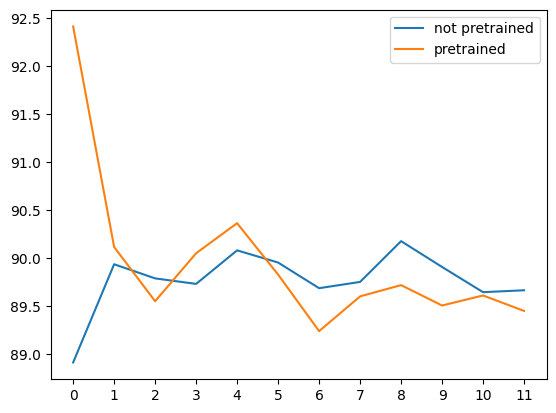

Dataset: en_57 - Features: nfix


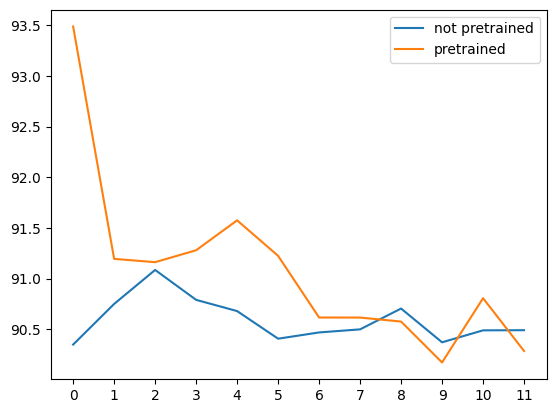

Dataset: en_57 - Features: refix


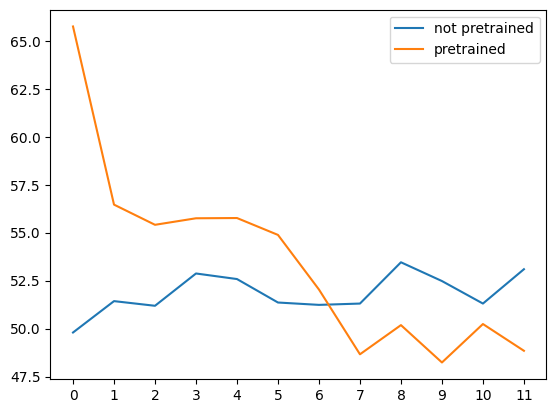

Dataset: en_57 - Features: reread


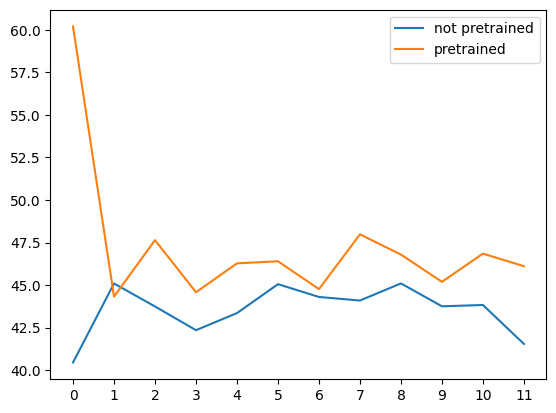

AVERAGED-Dataset: Features: skip


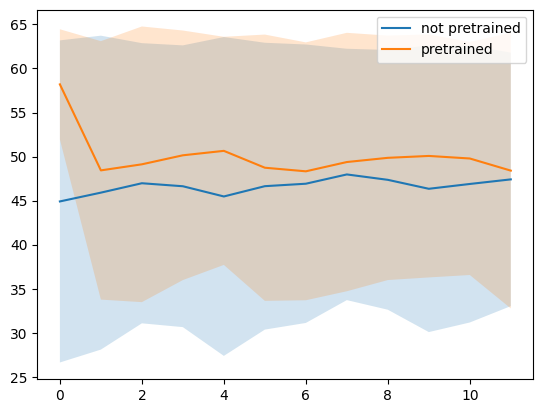

AVERAGED-Dataset: Features: firstfix_dur


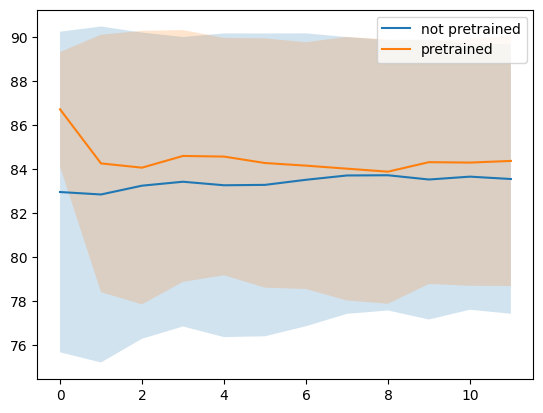

AVERAGED-Dataset: Features: firstrun_dur


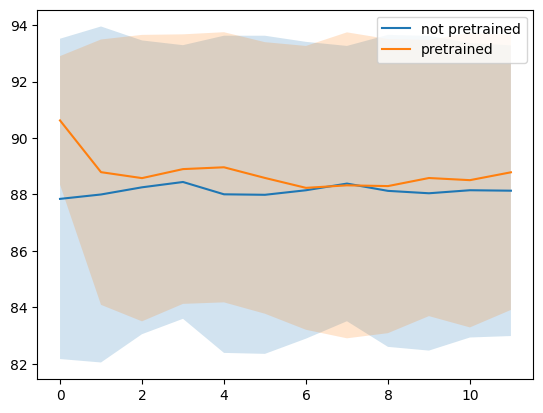

AVERAGED-Dataset: Features: dur


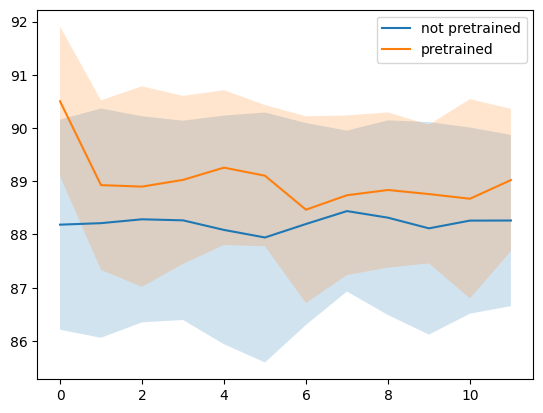

AVERAGED-Dataset: Features: firstrun_nfix


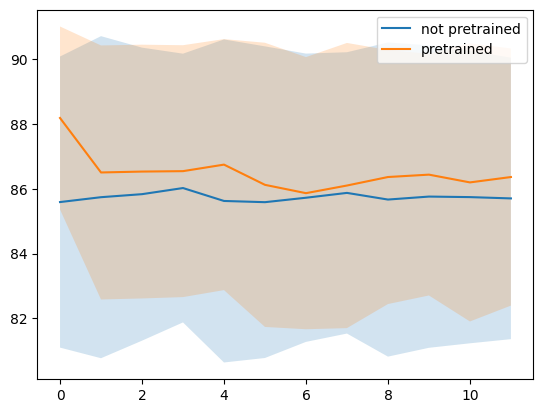

AVERAGED-Dataset: Features: nfix


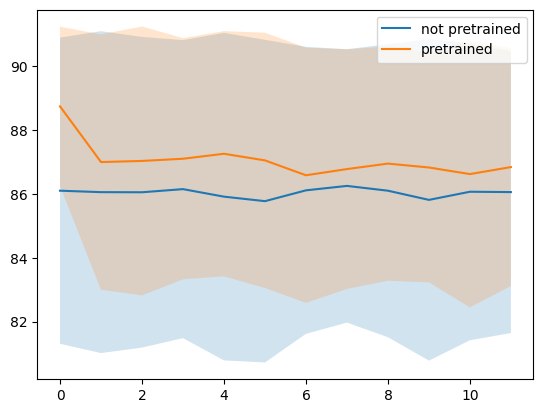

AVERAGED-Dataset: Features: refix


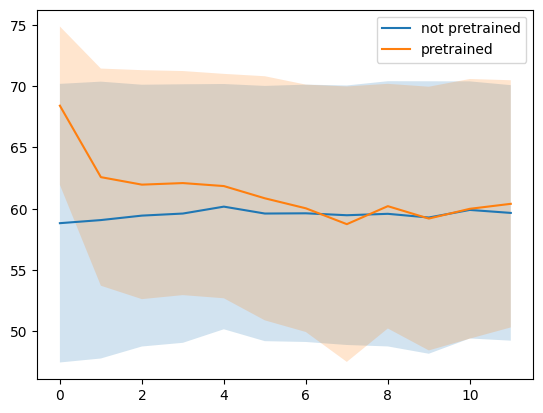

AVERAGED-Dataset: Features: reread


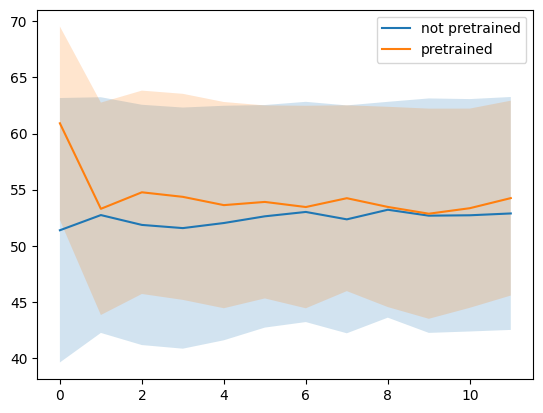

In [4]:
print_probe_results(dict_res_roberta)

## CAMEM Results

Dataset: it_43 - Features: skip


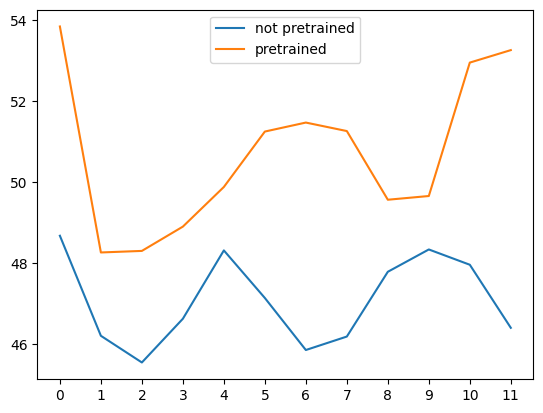

Dataset: it_43 - Features: firstfix_dur


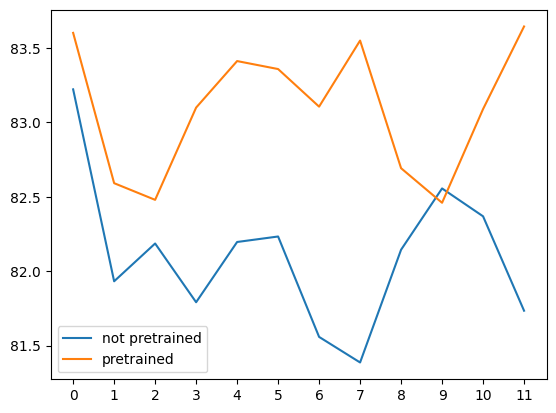

Dataset: it_43 - Features: firstrun_dur


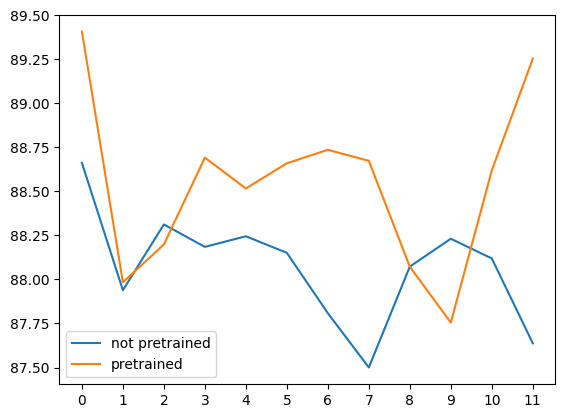

Dataset: it_43 - Features: dur


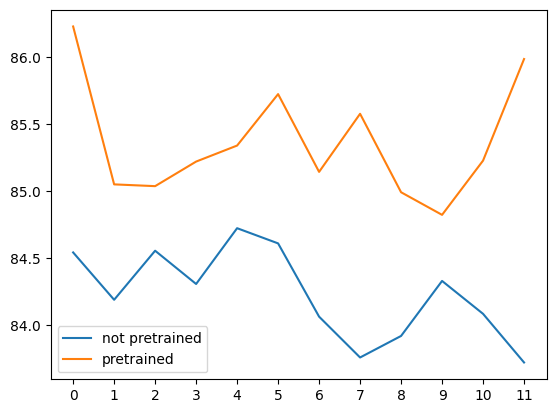

Dataset: it_43 - Features: firstrun_nfix


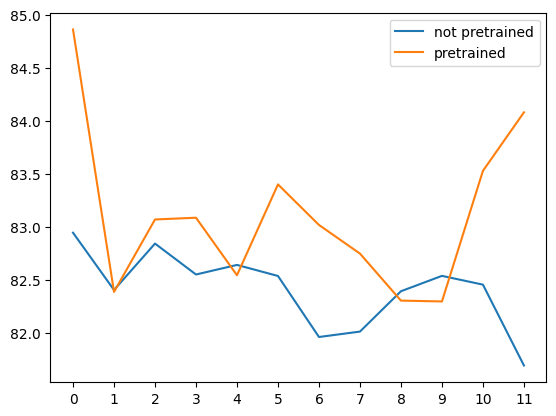

Dataset: it_43 - Features: nfix


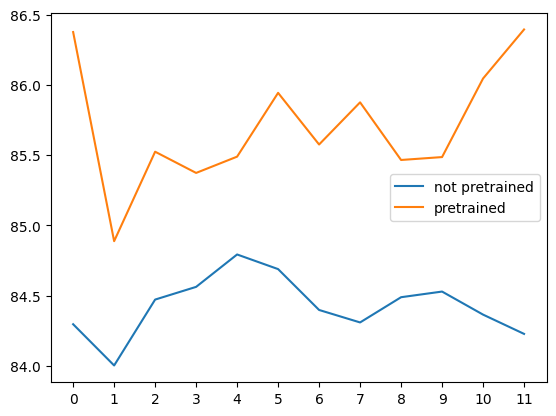

Dataset: it_43 - Features: refix


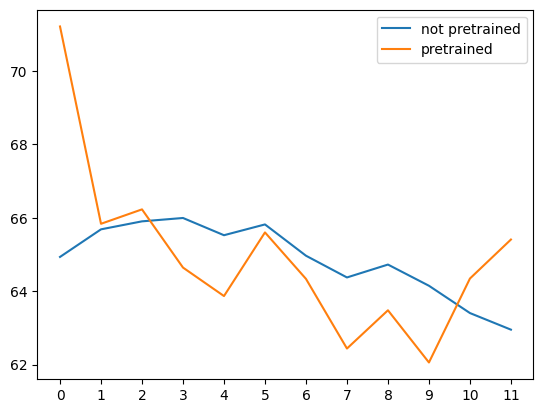

Dataset: it_43 - Features: reread


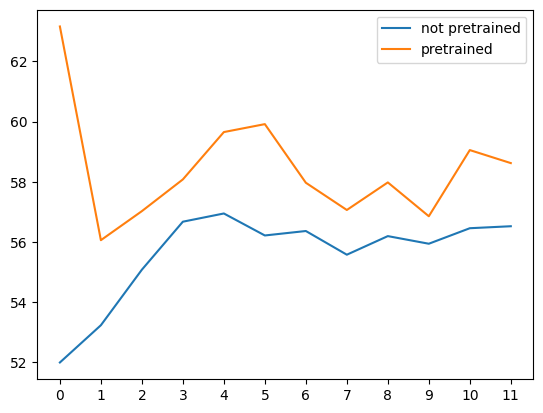

Dataset: it_38 - Features: skip


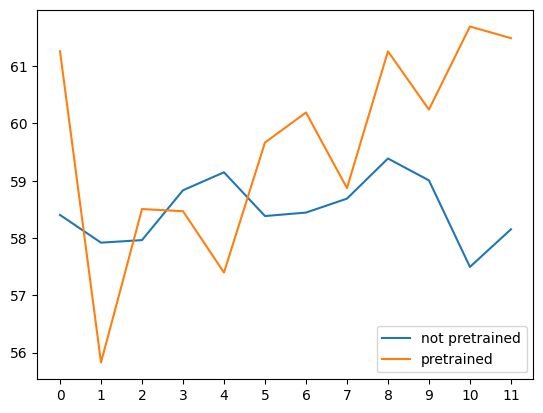

Dataset: it_38 - Features: firstfix_dur


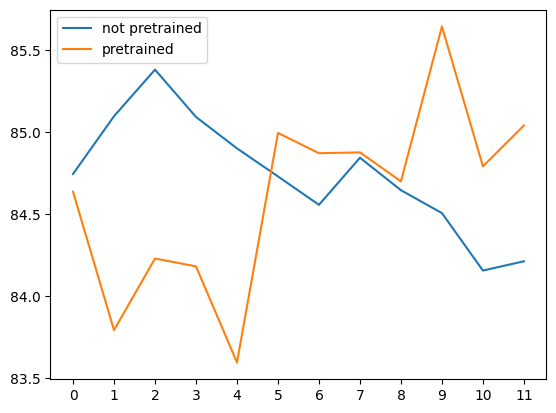

Dataset: it_38 - Features: firstrun_dur


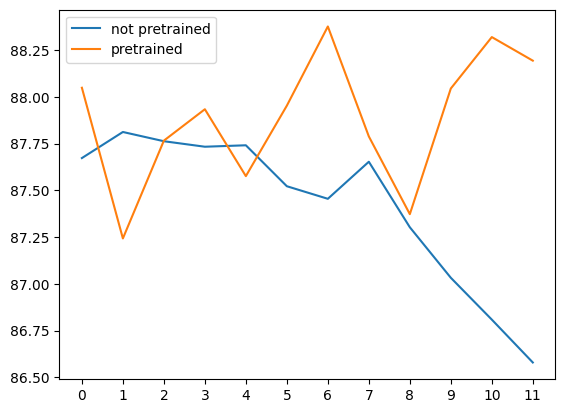

Dataset: it_38 - Features: dur


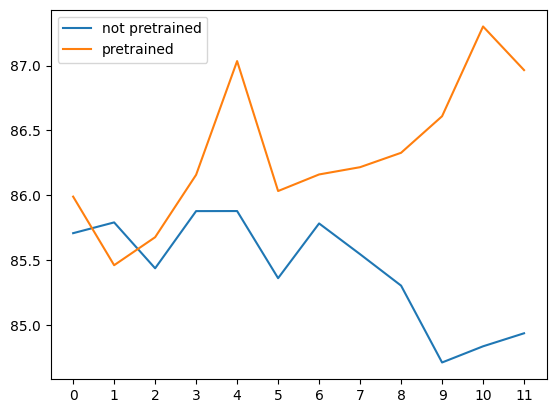

Dataset: it_38 - Features: firstrun_nfix


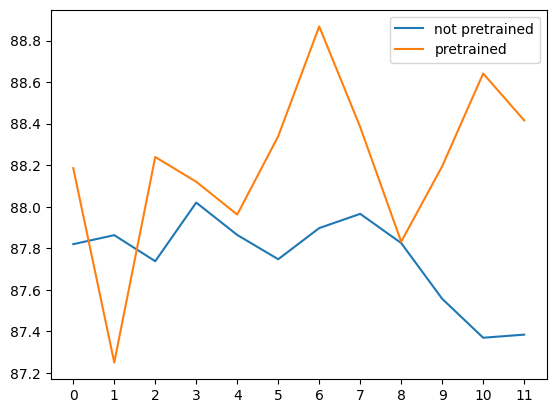

Dataset: it_38 - Features: nfix


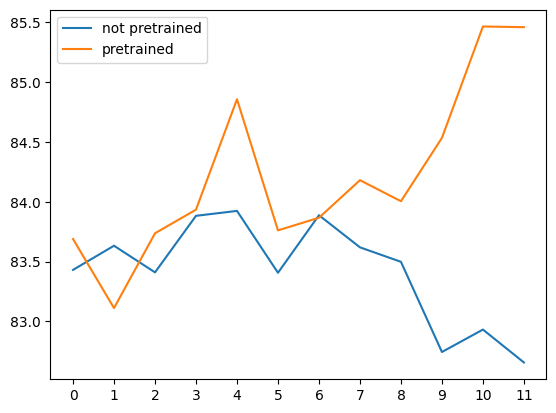

Dataset: it_38 - Features: refix


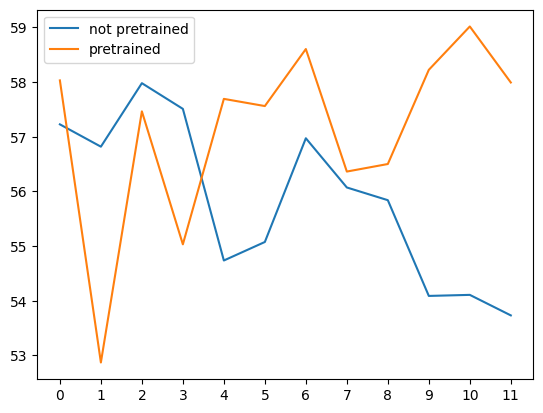

Dataset: it_38 - Features: reread


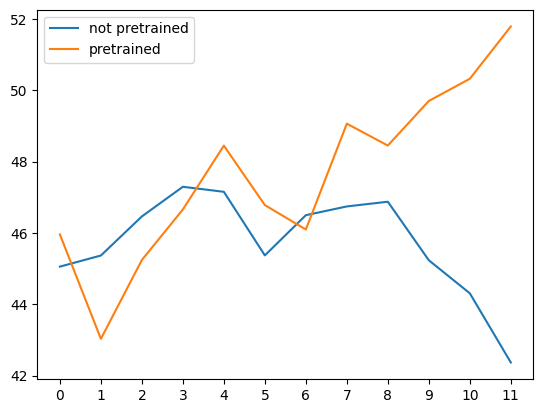

Dataset: it_26 - Features: skip


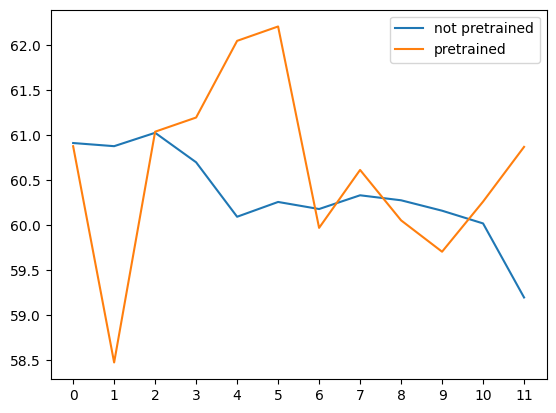

Dataset: it_26 - Features: firstfix_dur


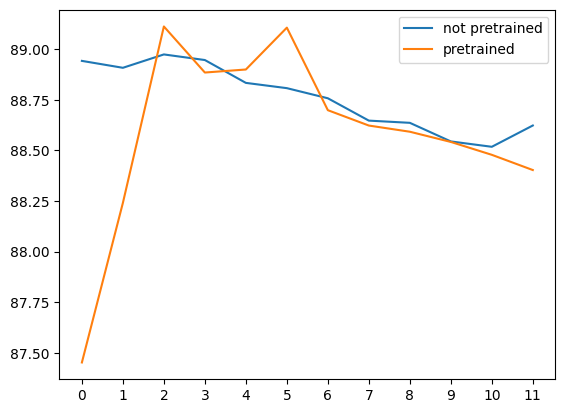

Dataset: it_26 - Features: firstrun_dur


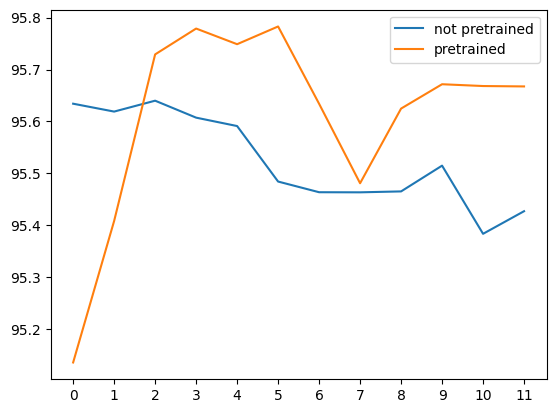

Dataset: it_26 - Features: dur


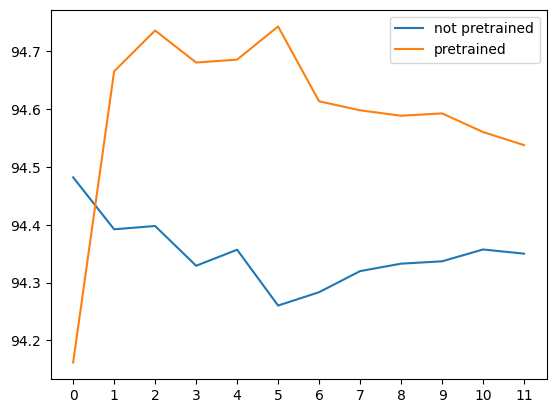

Dataset: it_26 - Features: firstrun_nfix


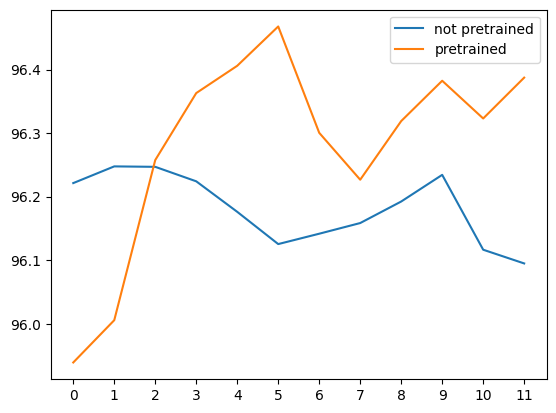

Dataset: it_26 - Features: nfix


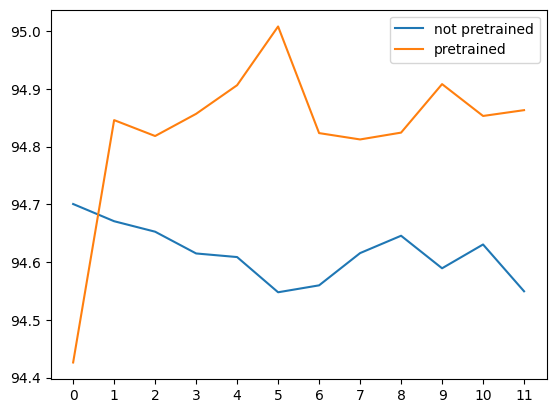

Dataset: it_26 - Features: refix


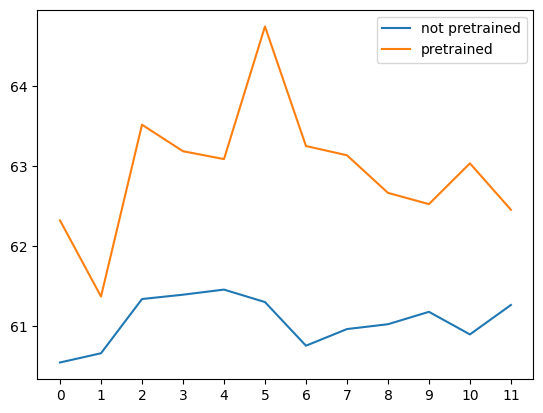

Dataset: it_26 - Features: reread


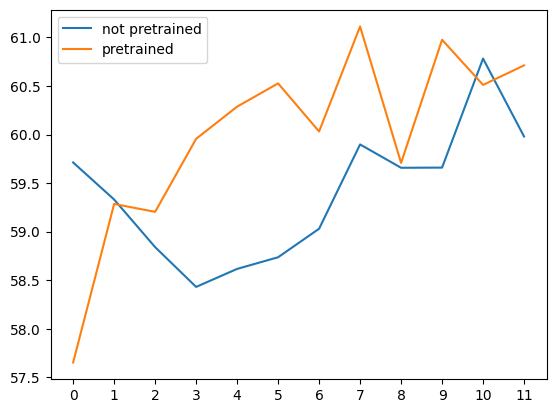

Dataset: it_1 - Features: skip


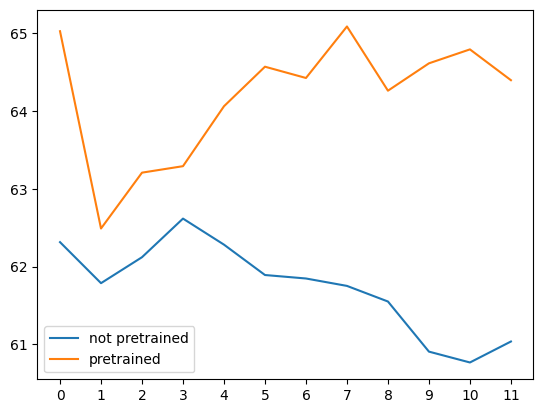

Dataset: it_1 - Features: firstfix_dur


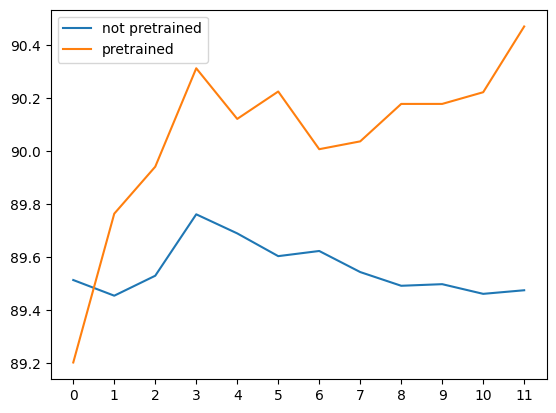

Dataset: it_1 - Features: firstrun_dur


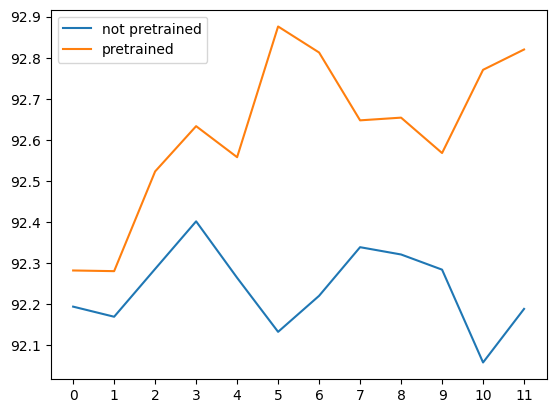

Dataset: it_1 - Features: dur


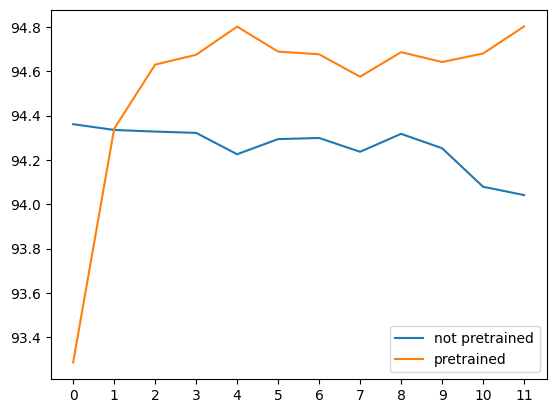

Dataset: it_1 - Features: firstrun_nfix


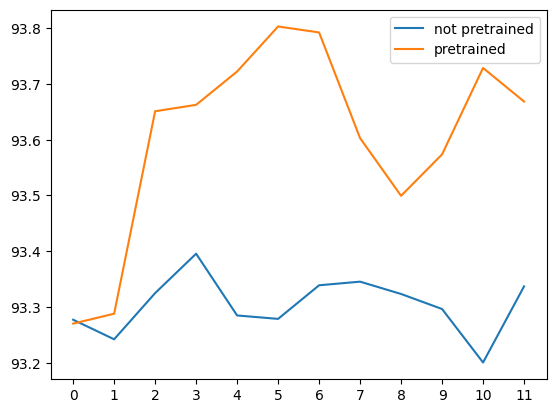

Dataset: it_1 - Features: nfix


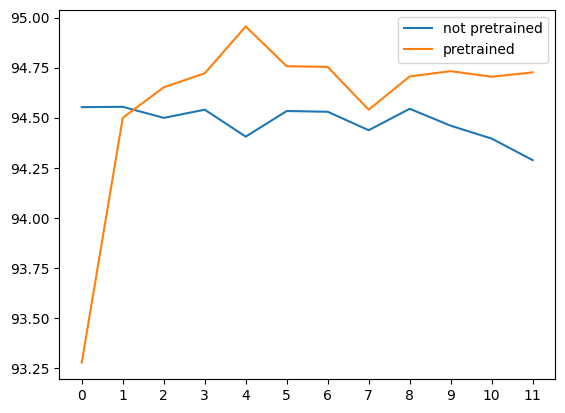

Dataset: it_1 - Features: refix


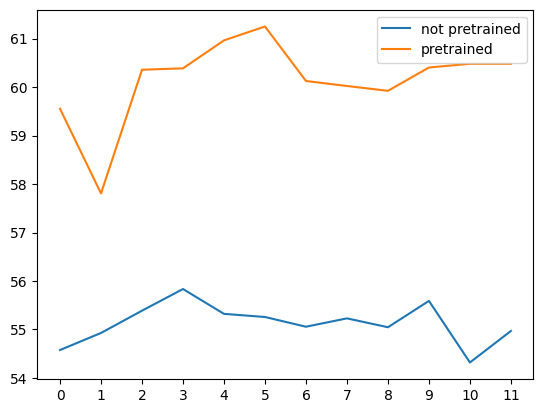

Dataset: it_1 - Features: reread


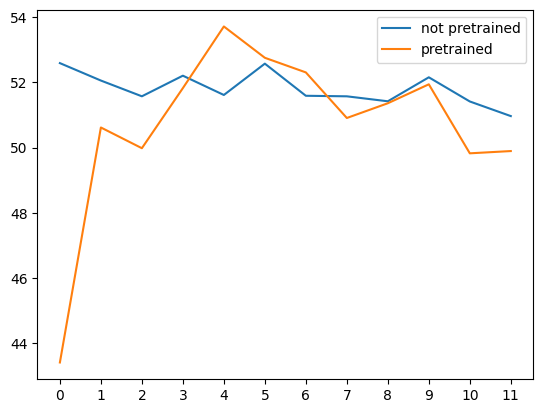

Dataset: it_44 - Features: skip


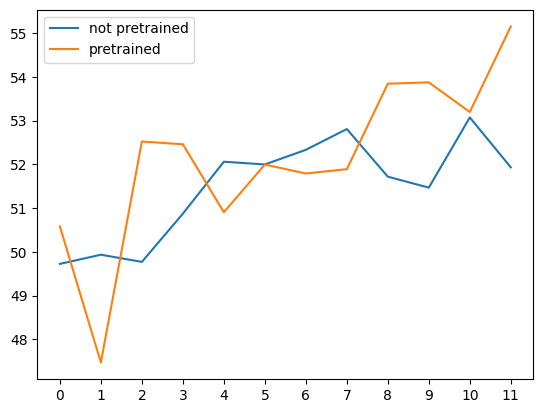

Dataset: it_44 - Features: firstfix_dur


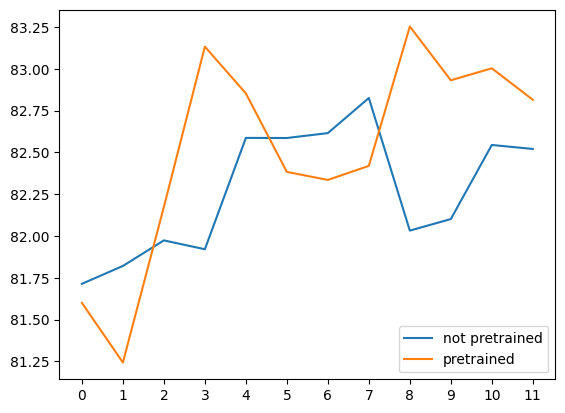

Dataset: it_44 - Features: firstrun_dur


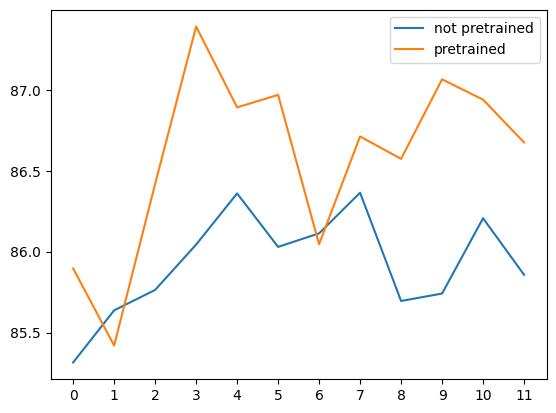

Dataset: it_44 - Features: dur


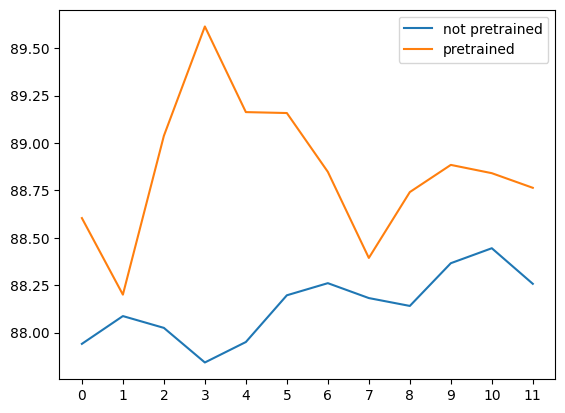

Dataset: it_44 - Features: firstrun_nfix


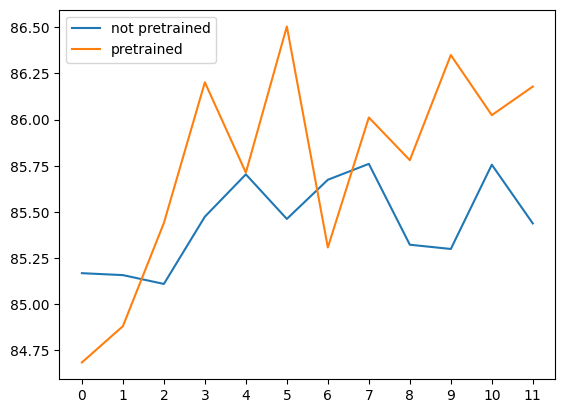

Dataset: it_44 - Features: nfix


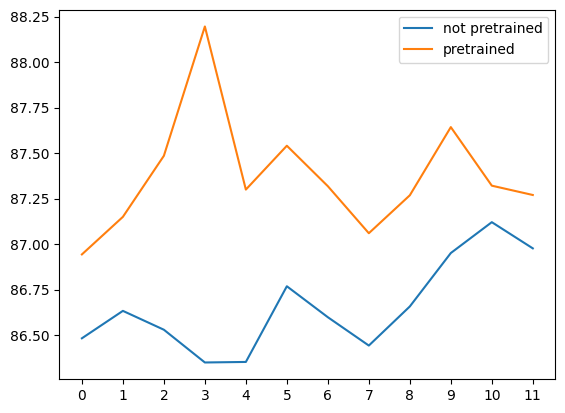

Dataset: it_44 - Features: refix


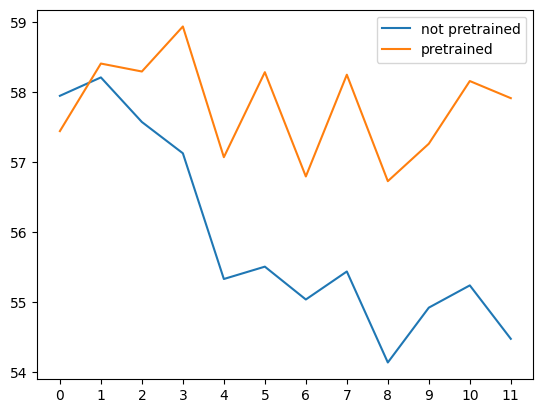

Dataset: it_44 - Features: reread


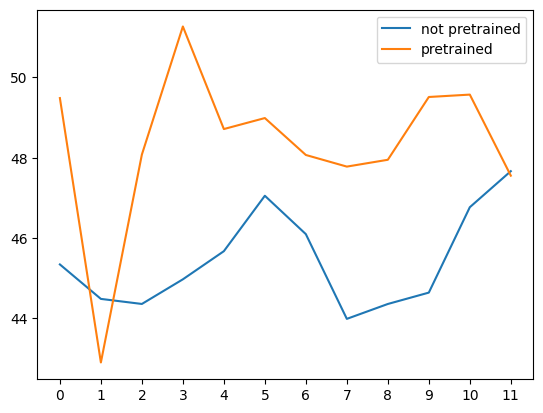

AVERAGED-Dataset: Features: skip


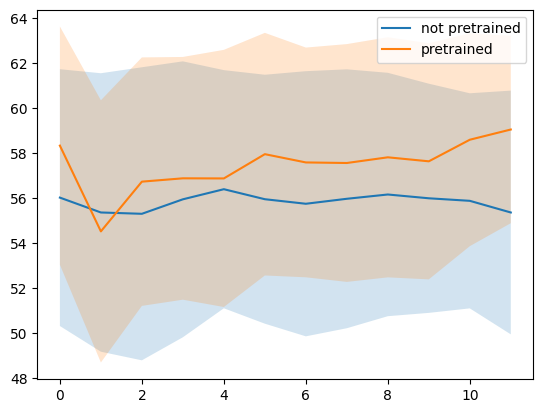

AVERAGED-Dataset: Features: firstfix_dur


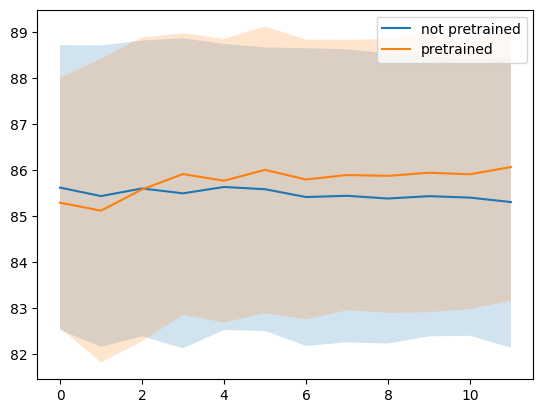

AVERAGED-Dataset: Features: firstrun_dur


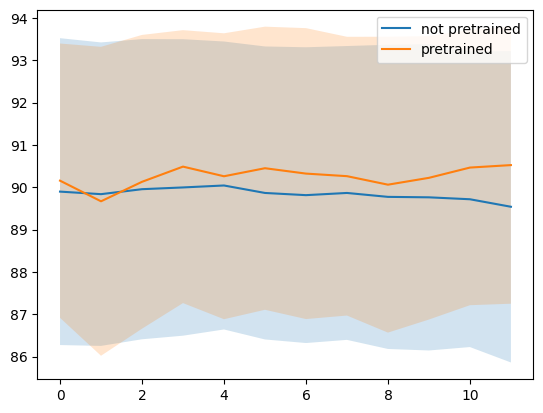

AVERAGED-Dataset: Features: dur


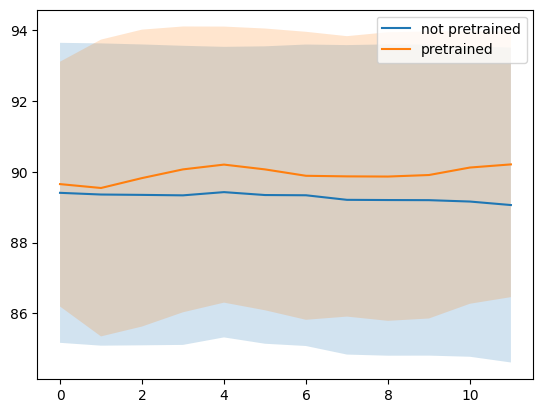

AVERAGED-Dataset: Features: firstrun_nfix


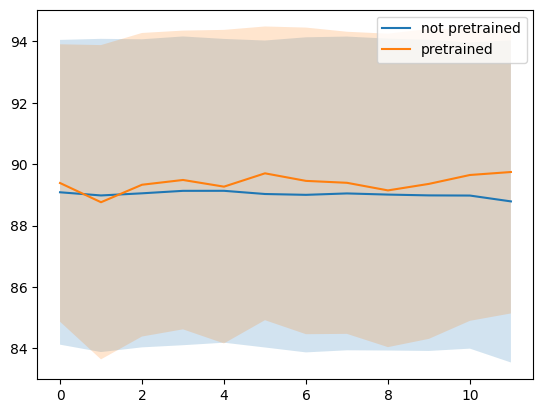

AVERAGED-Dataset: Features: nfix


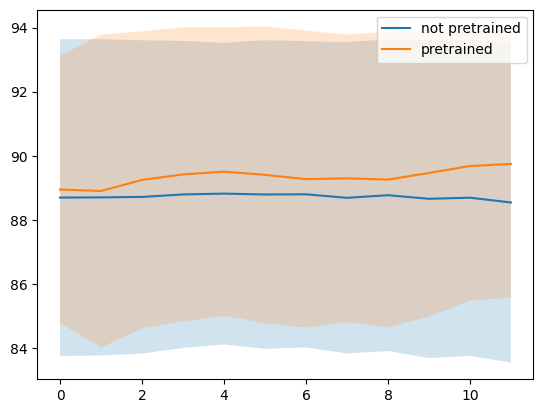

AVERAGED-Dataset: Features: refix


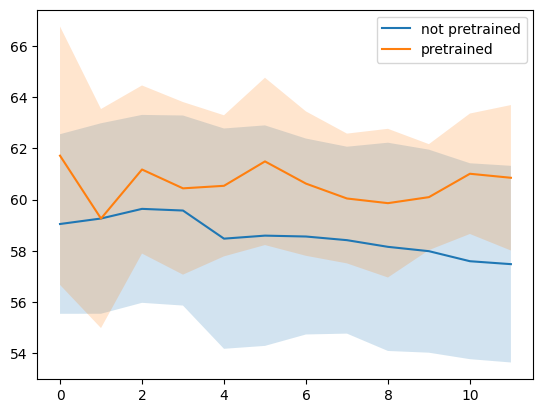

AVERAGED-Dataset: Features: reread


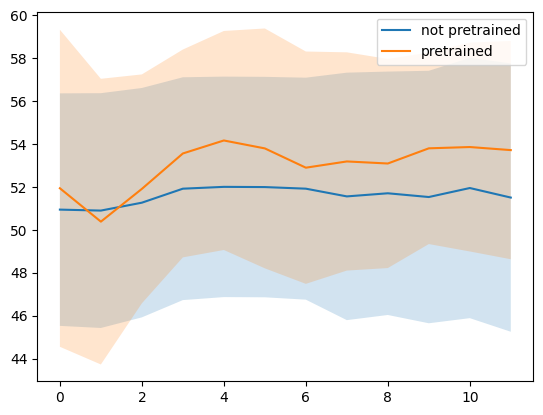

In [5]:
print_probe_results(dict_res_camem)

## XLM Results

In [6]:
en_xlm_res, it_xlm_res = divide_en_it_ds(dict_res_xlm)

### EN

Dataset: en_57 - Features: skip


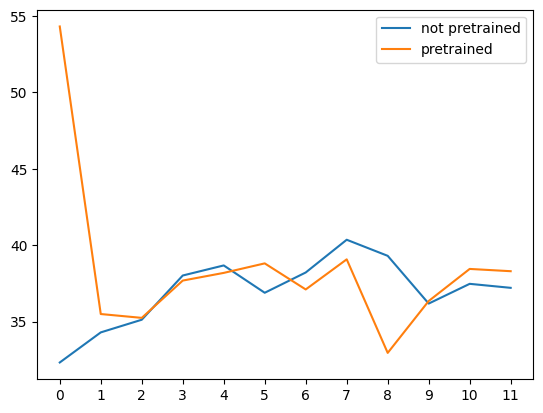

Dataset: en_57 - Features: firstfix_dur


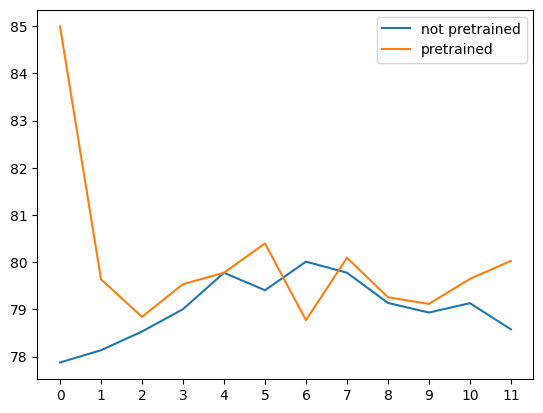

Dataset: en_57 - Features: firstrun_dur


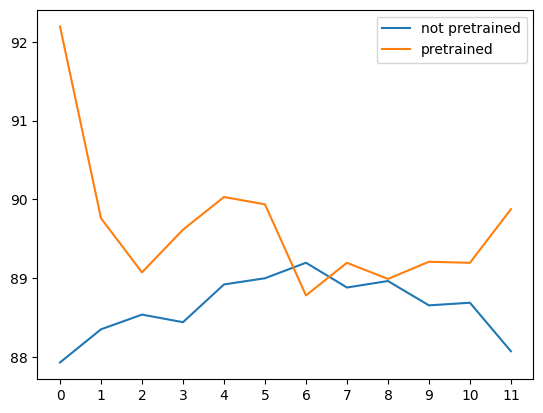

Dataset: en_57 - Features: dur


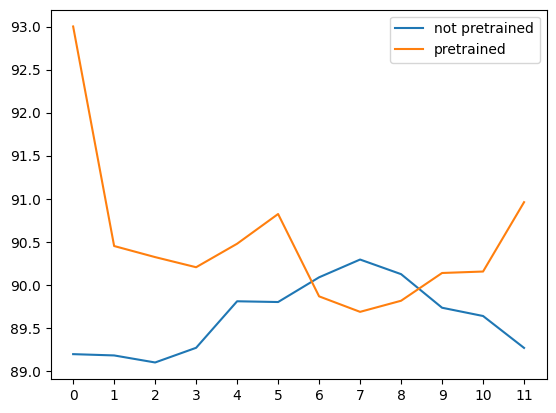

Dataset: en_57 - Features: firstrun_nfix


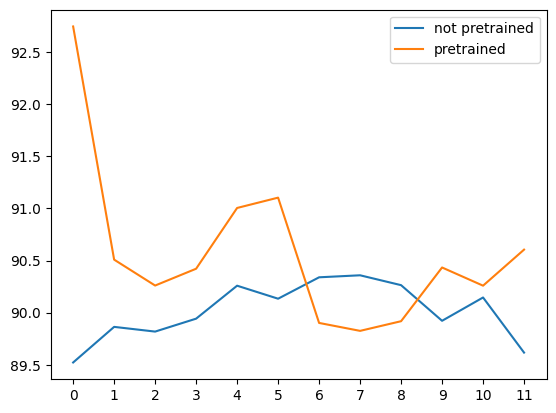

Dataset: en_57 - Features: nfix


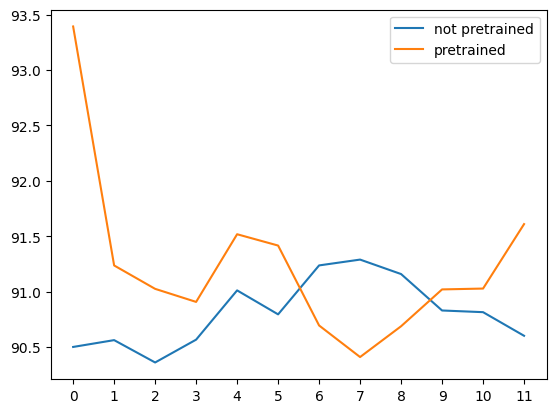

Dataset: en_57 - Features: refix


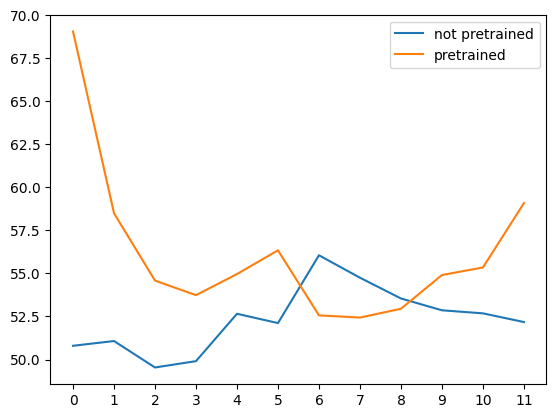

Dataset: en_57 - Features: reread


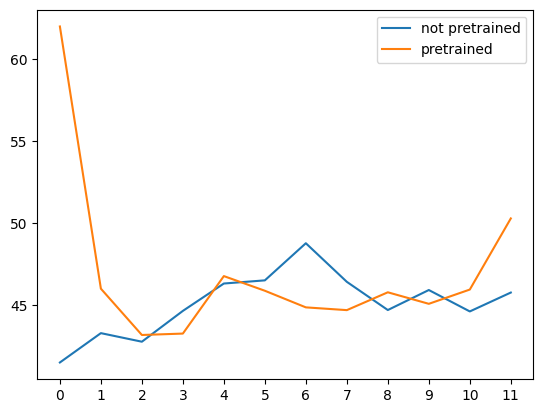

Dataset: en_6 - Features: skip


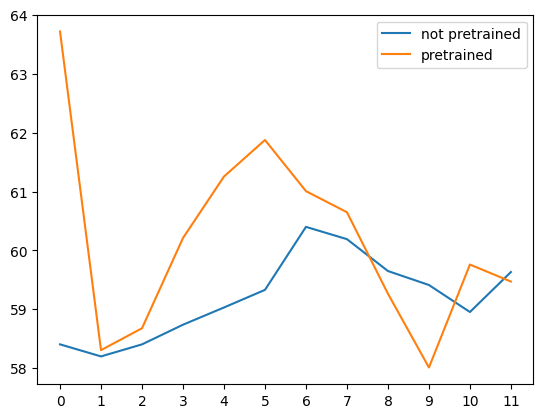

Dataset: en_6 - Features: firstfix_dur


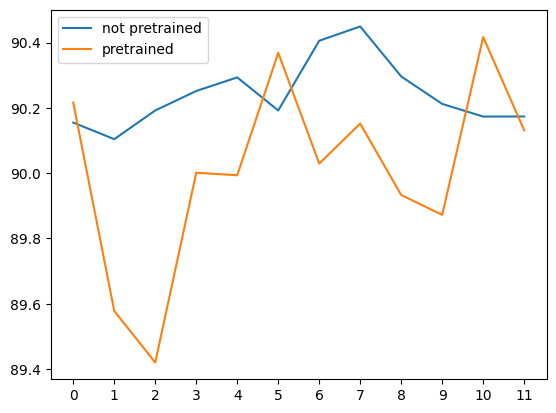

Dataset: en_6 - Features: firstrun_dur


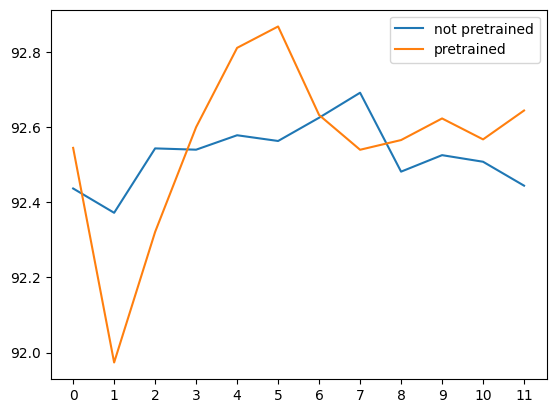

Dataset: en_6 - Features: dur


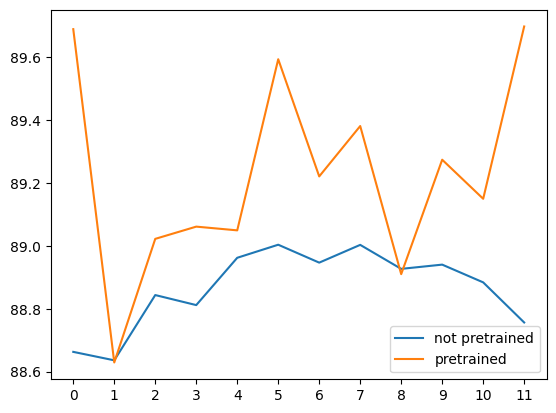

Dataset: en_6 - Features: firstrun_nfix


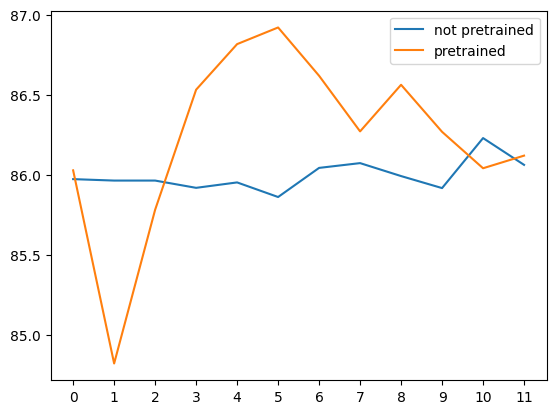

Dataset: en_6 - Features: nfix


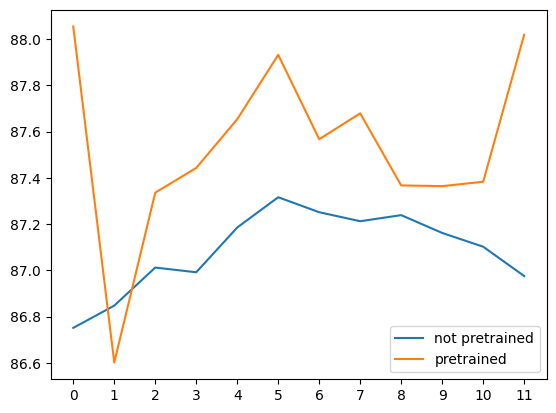

Dataset: en_6 - Features: refix


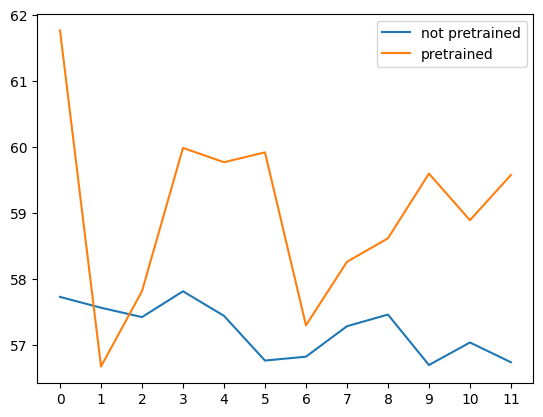

Dataset: en_6 - Features: reread


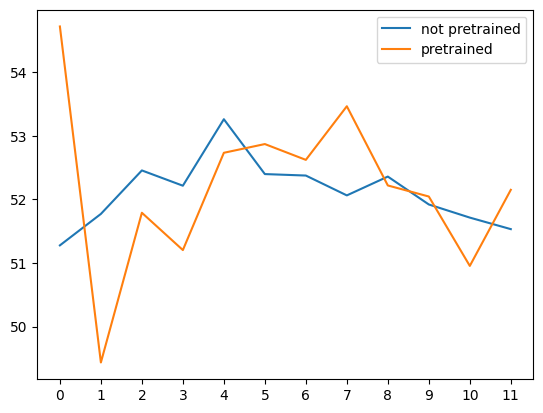

Dataset: en_49 - Features: skip


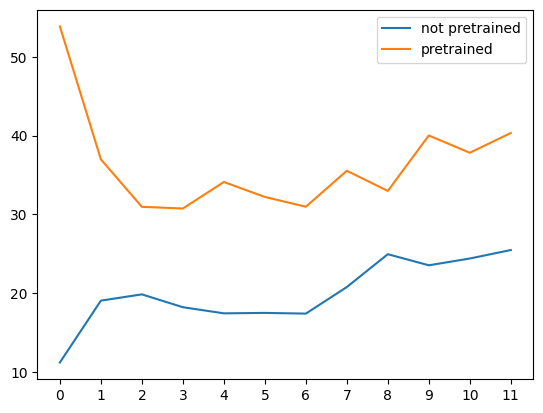

Dataset: en_49 - Features: firstfix_dur


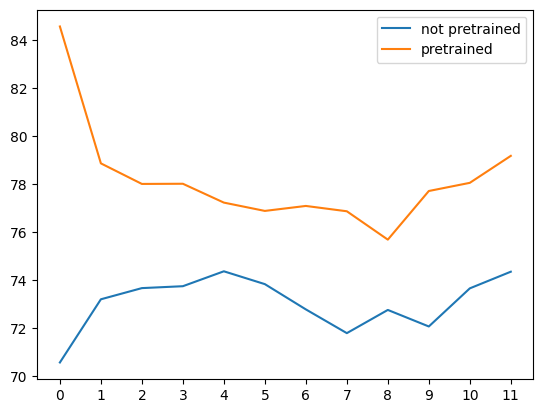

Dataset: en_49 - Features: firstrun_dur


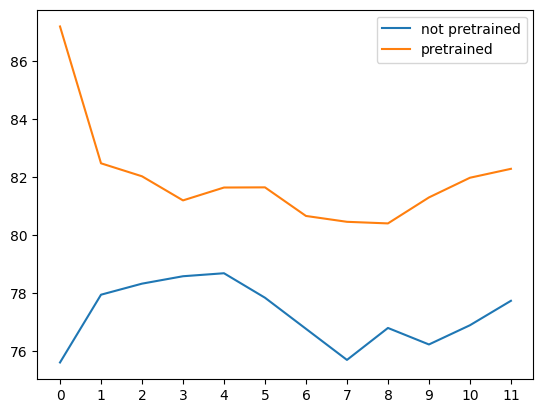

Dataset: en_49 - Features: dur


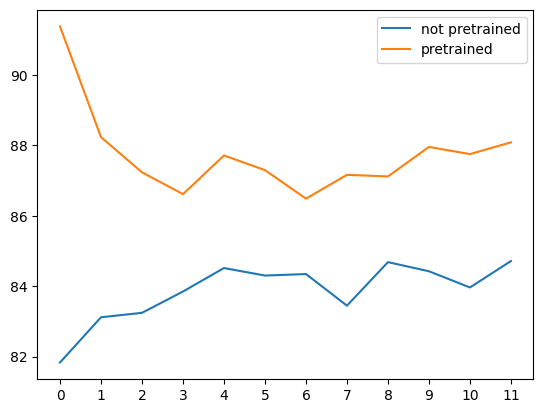

Dataset: en_49 - Features: firstrun_nfix


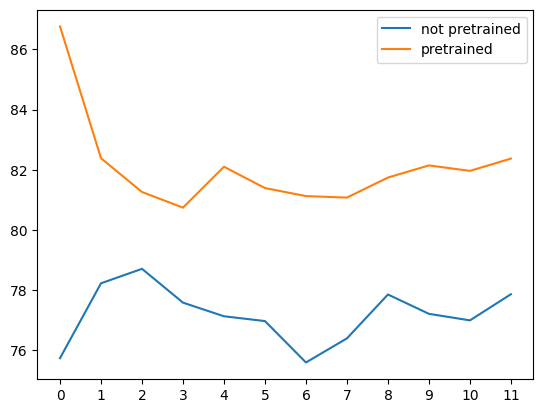

Dataset: en_49 - Features: nfix


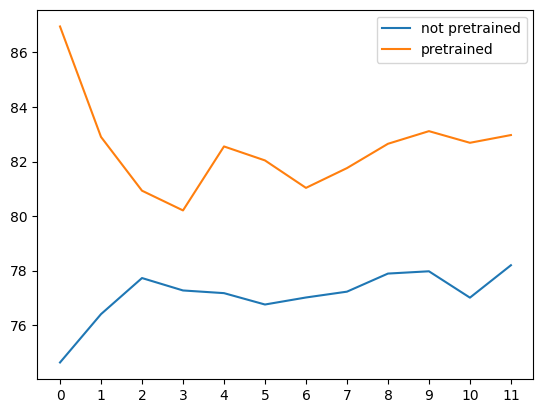

Dataset: en_49 - Features: refix


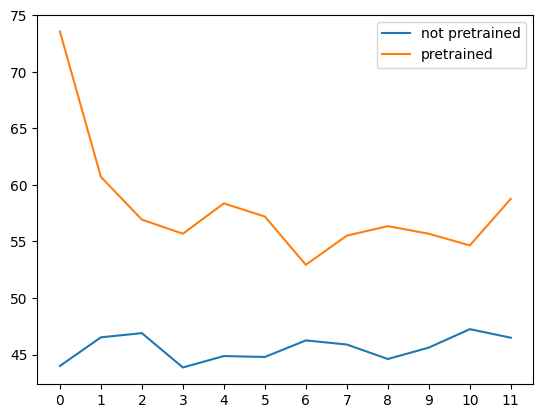

Dataset: en_49 - Features: reread


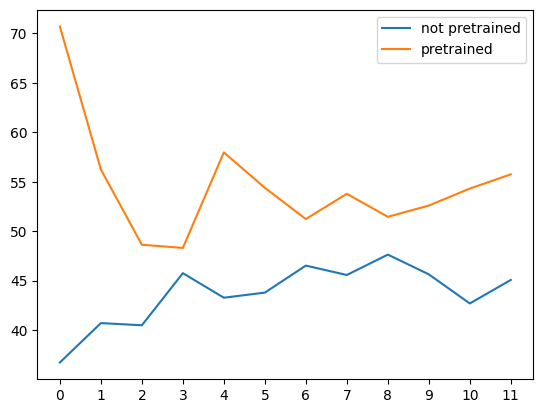

Dataset: en_98 - Features: skip


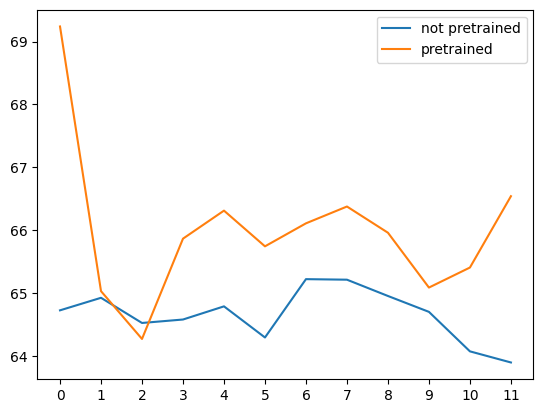

Dataset: en_98 - Features: firstfix_dur


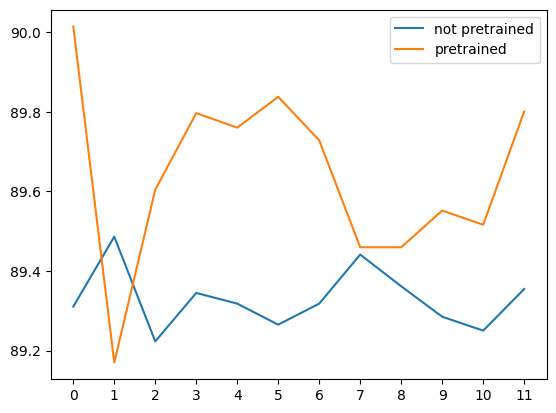

Dataset: en_98 - Features: firstrun_dur


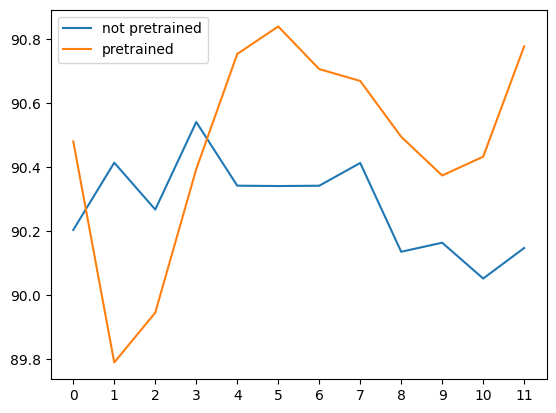

Dataset: en_98 - Features: dur


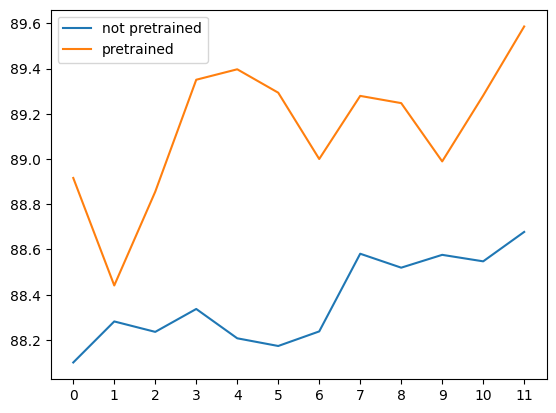

Dataset: en_98 - Features: firstrun_nfix


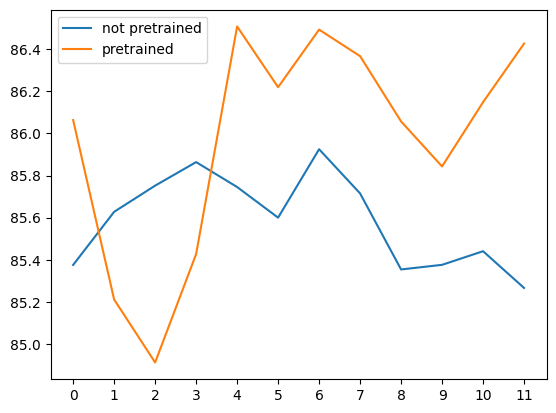

Dataset: en_98 - Features: nfix


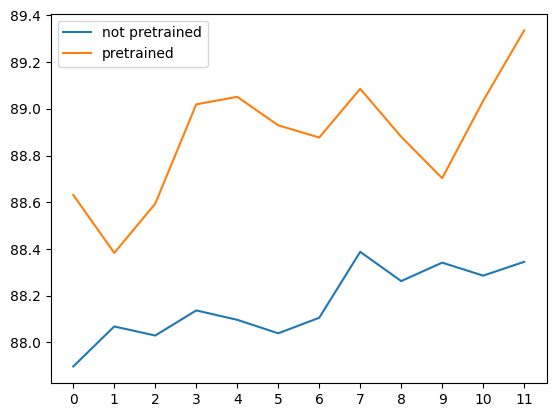

Dataset: en_98 - Features: refix


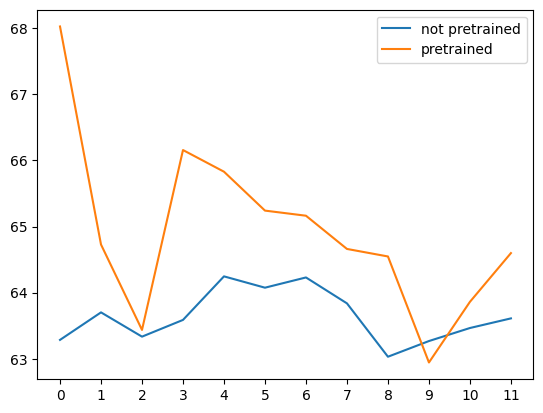

Dataset: en_98 - Features: reread


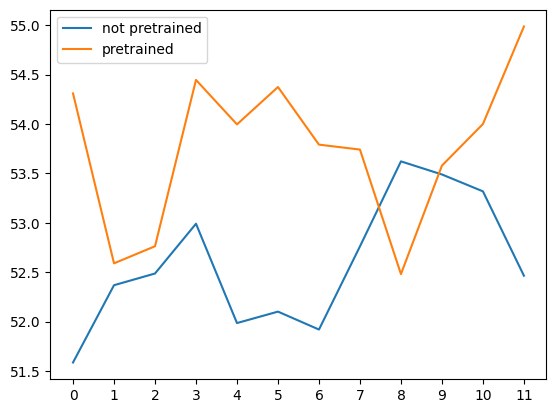

Dataset: en_83 - Features: skip


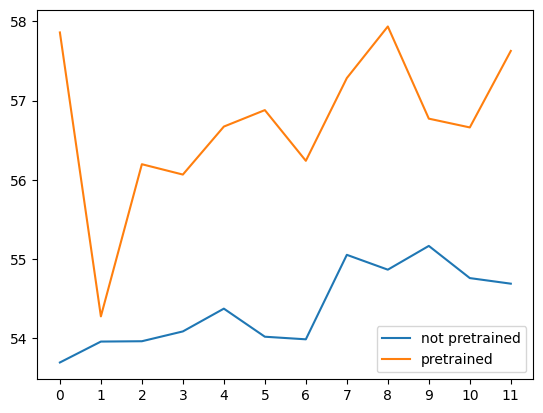

Dataset: en_83 - Features: firstfix_dur


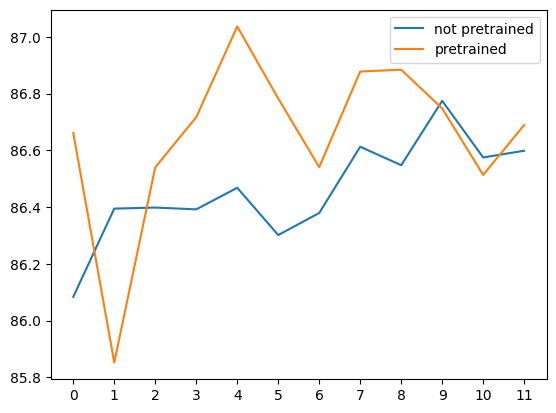

Dataset: en_83 - Features: firstrun_dur


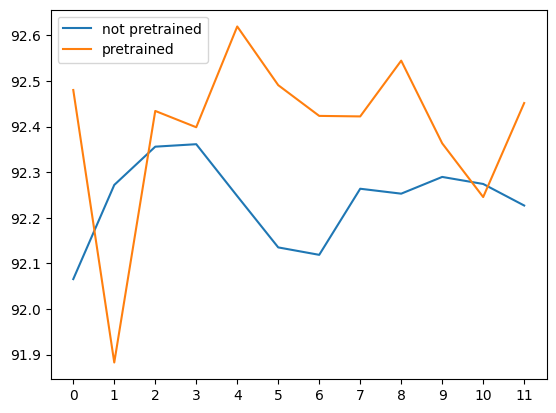

Dataset: en_83 - Features: dur


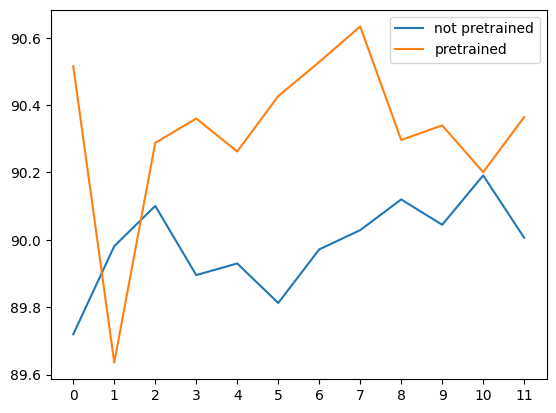

Dataset: en_83 - Features: firstrun_nfix


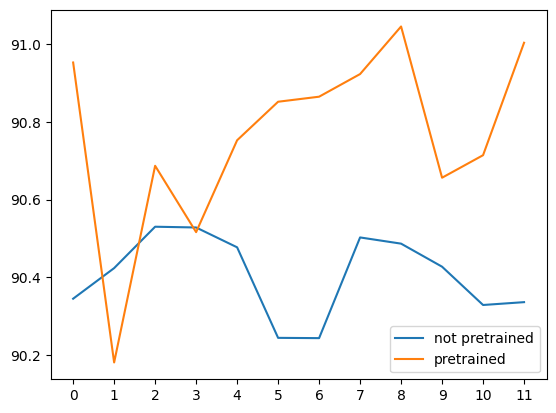

Dataset: en_83 - Features: nfix


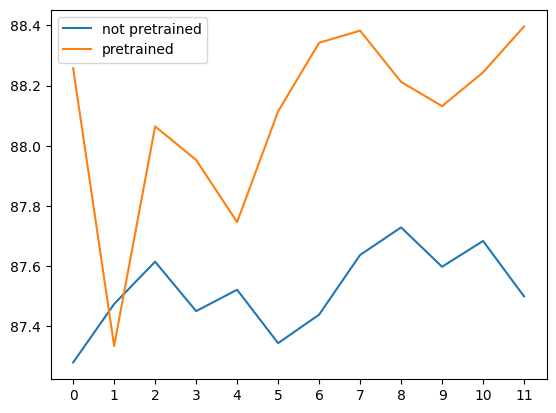

Dataset: en_83 - Features: refix


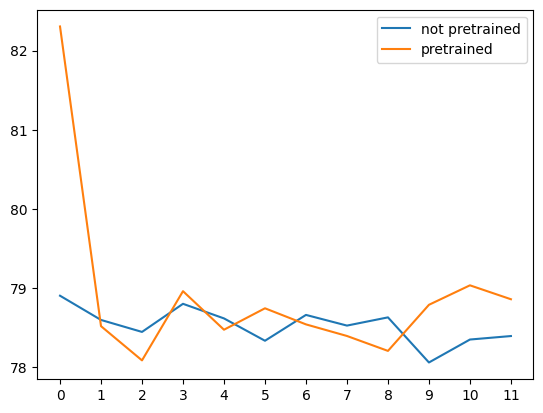

Dataset: en_83 - Features: reread


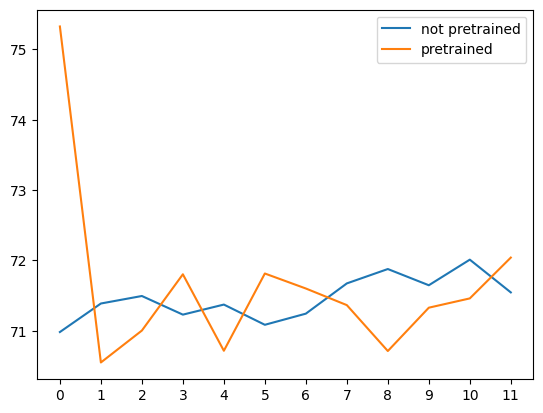

AVERAGED-Dataset: Features: skip


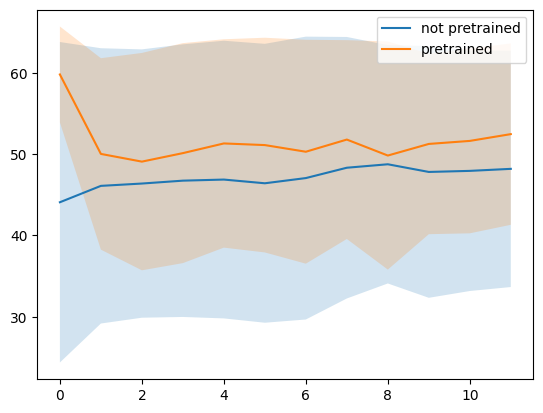

AVERAGED-Dataset: Features: firstfix_dur


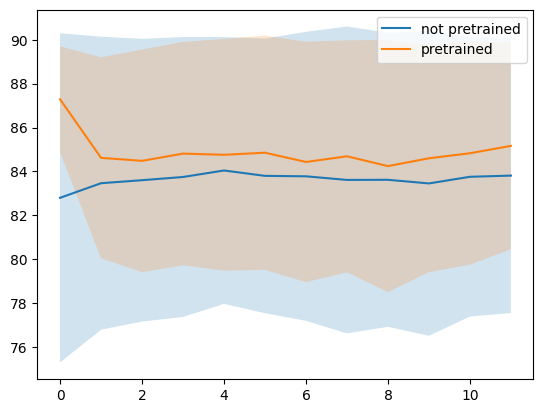

AVERAGED-Dataset: Features: firstrun_dur


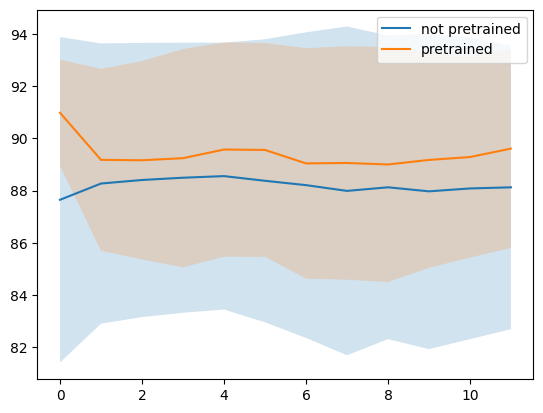

AVERAGED-Dataset: Features: dur


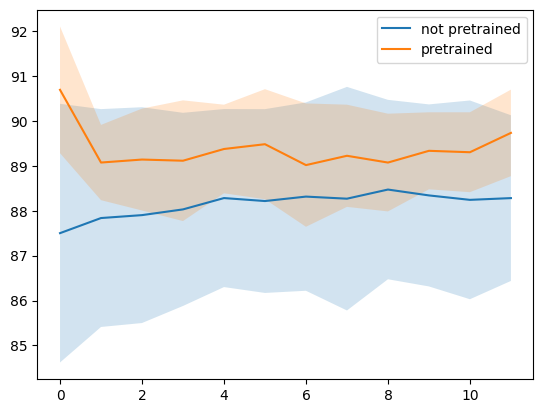

AVERAGED-Dataset: Features: firstrun_nfix


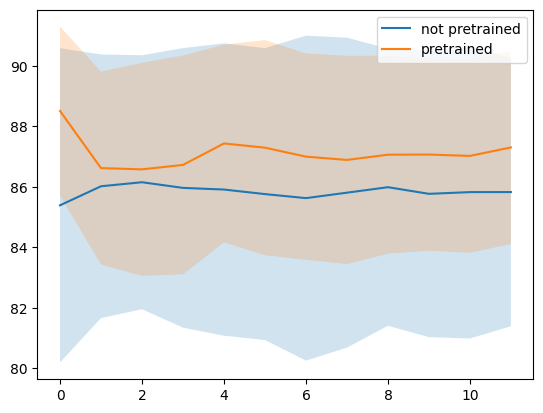

AVERAGED-Dataset: Features: nfix


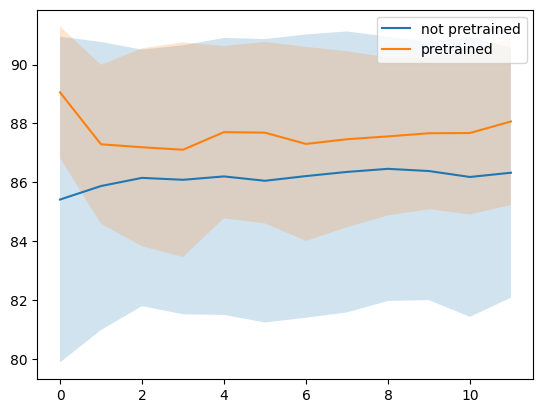

AVERAGED-Dataset: Features: refix


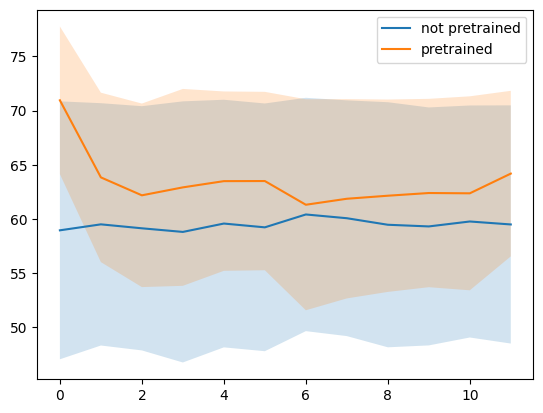

AVERAGED-Dataset: Features: reread


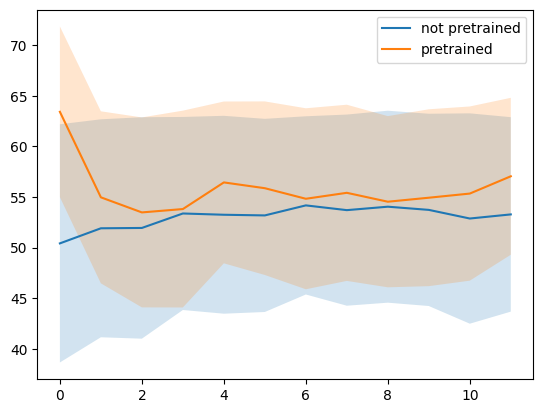

In [7]:
print_probe_results(en_xlm_res)

### IT

Dataset: it_26 - Features: skip


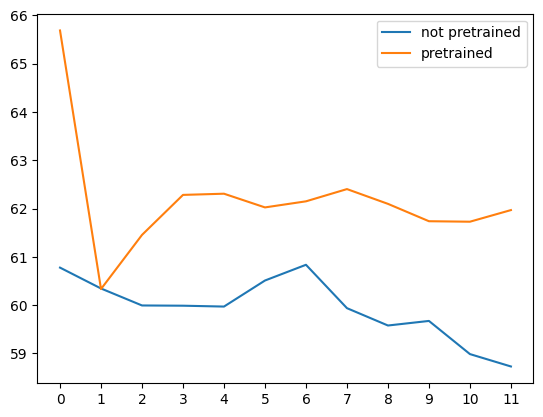

Dataset: it_26 - Features: firstfix_dur


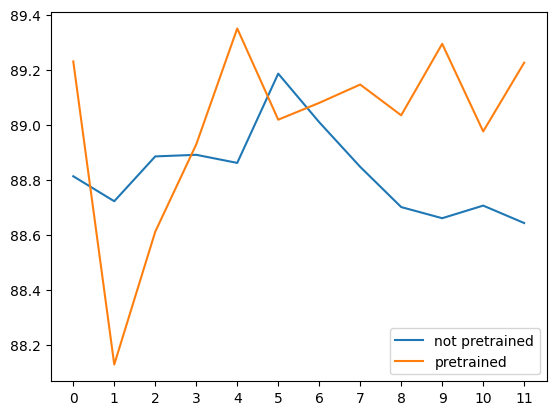

Dataset: it_26 - Features: firstrun_dur


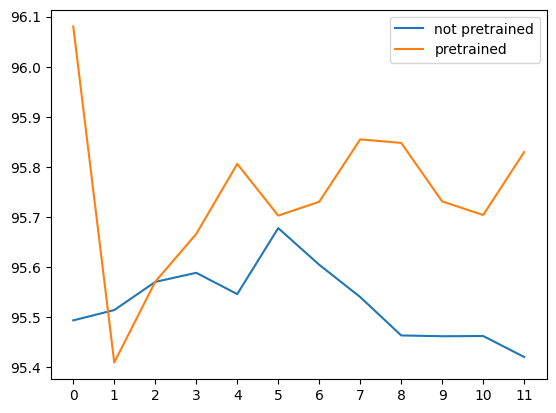

Dataset: it_26 - Features: dur


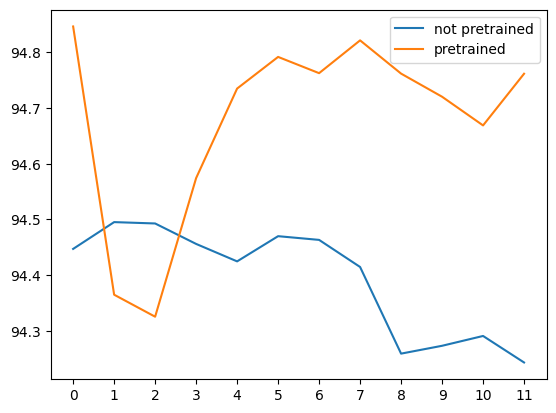

Dataset: it_26 - Features: firstrun_nfix


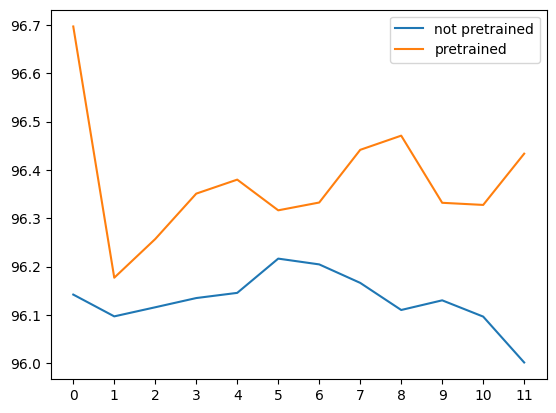

Dataset: it_26 - Features: nfix


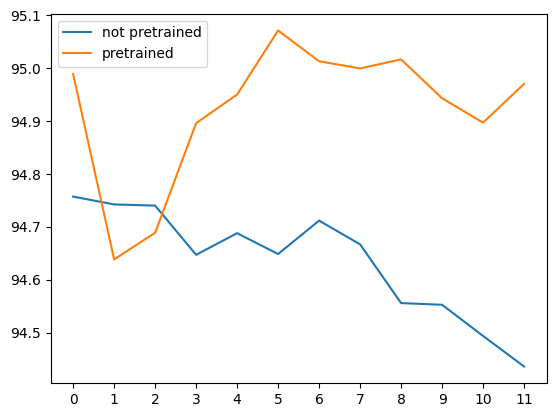

Dataset: it_26 - Features: refix


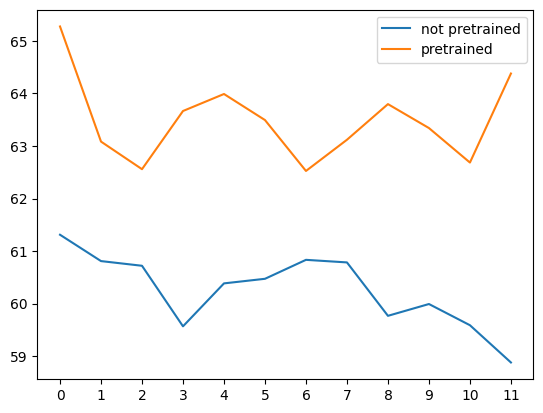

Dataset: it_26 - Features: reread


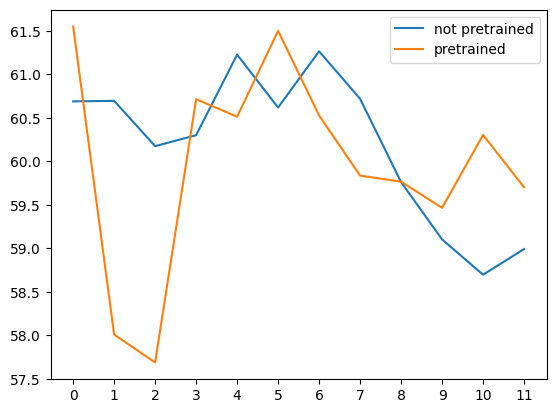

Dataset: it_43 - Features: skip


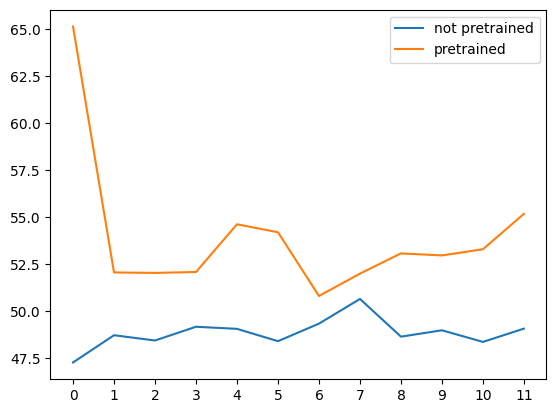

Dataset: it_43 - Features: firstfix_dur


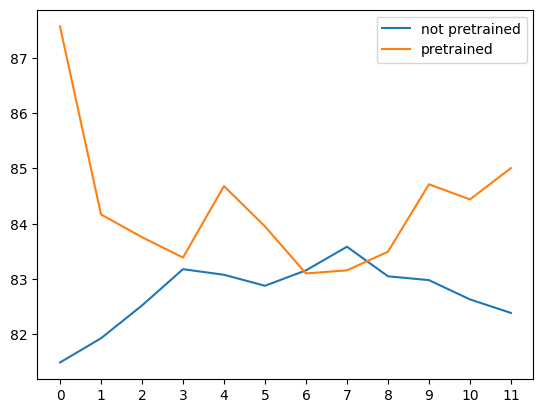

Dataset: it_43 - Features: firstrun_dur


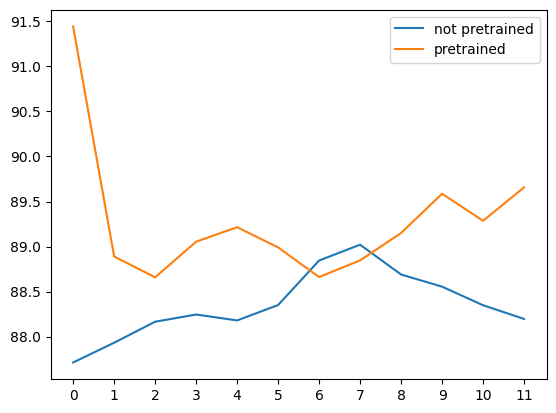

Dataset: it_43 - Features: dur


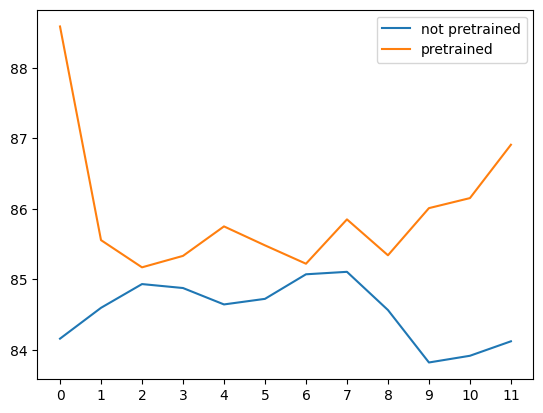

Dataset: it_43 - Features: firstrun_nfix


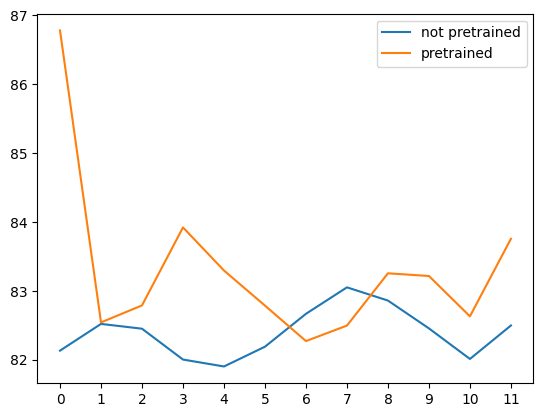

Dataset: it_43 - Features: nfix


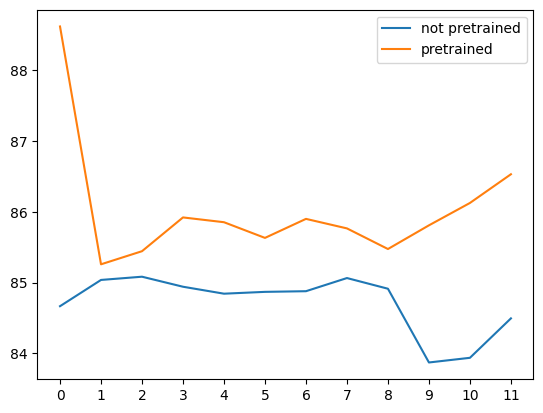

Dataset: it_43 - Features: refix


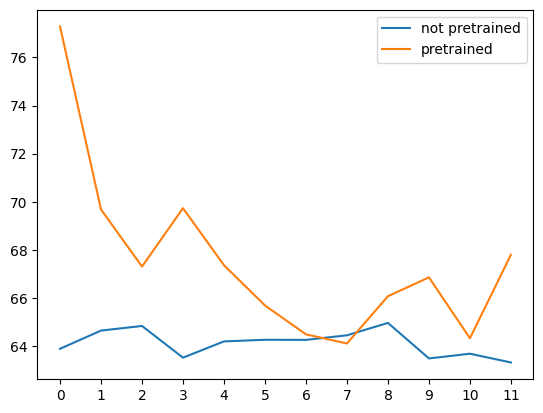

Dataset: it_43 - Features: reread


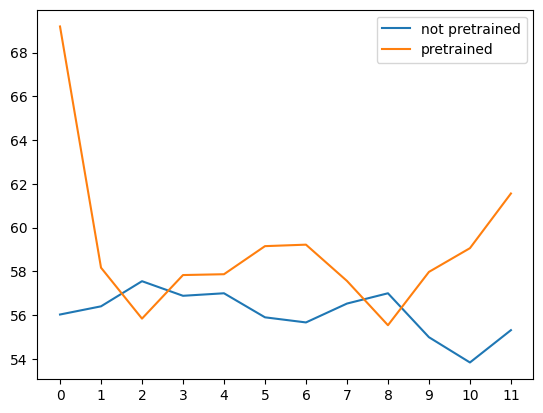

Dataset: it_44 - Features: skip


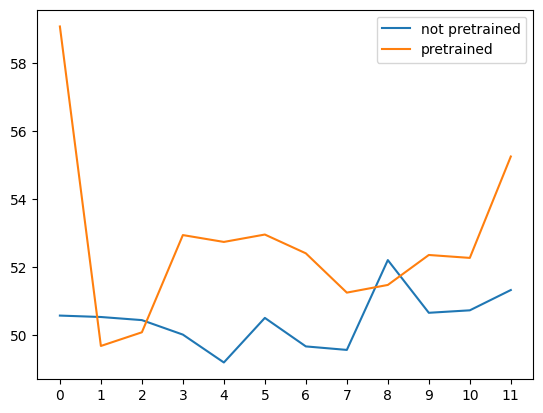

Dataset: it_44 - Features: firstfix_dur


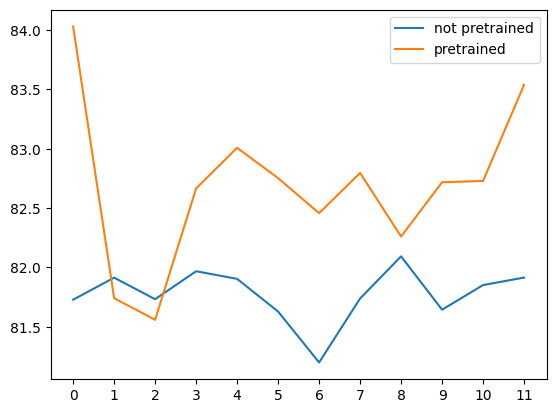

Dataset: it_44 - Features: firstrun_dur


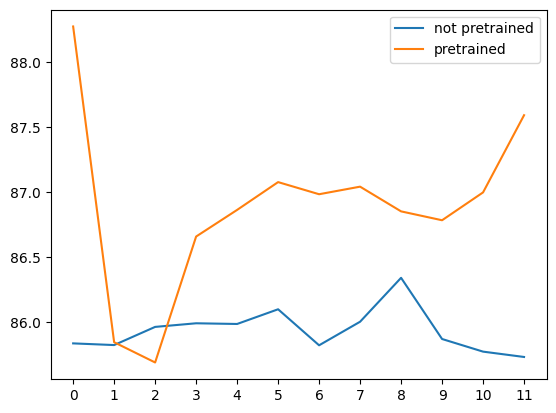

Dataset: it_44 - Features: dur


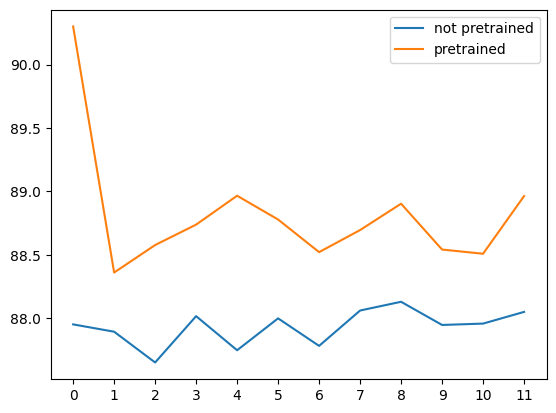

Dataset: it_44 - Features: firstrun_nfix


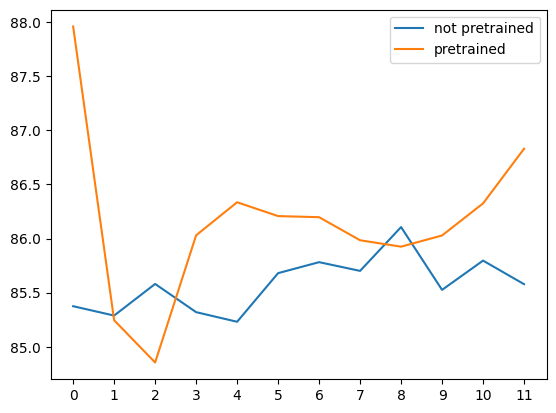

Dataset: it_44 - Features: nfix


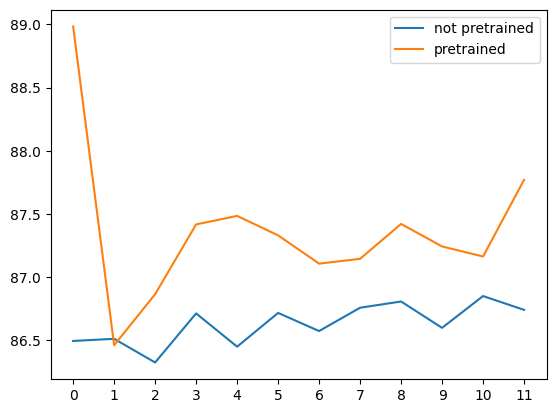

Dataset: it_44 - Features: refix


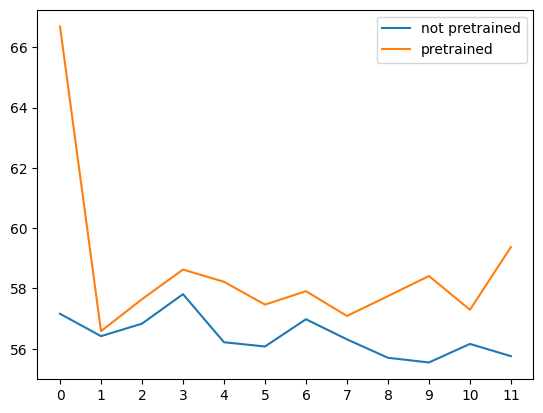

Dataset: it_44 - Features: reread


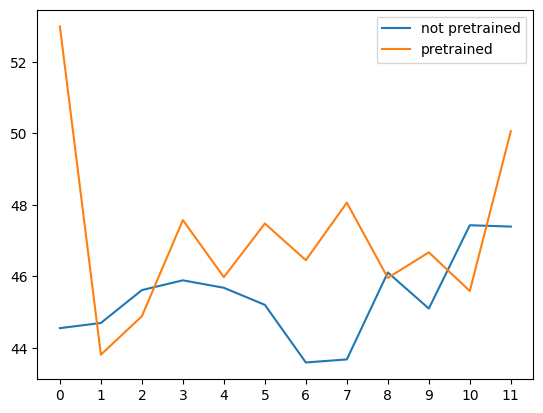

Dataset: it_1 - Features: skip


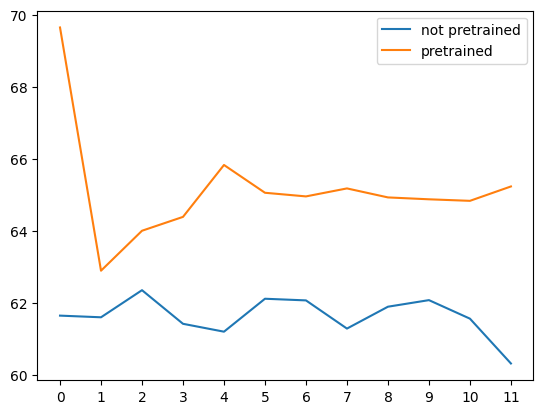

Dataset: it_1 - Features: firstfix_dur


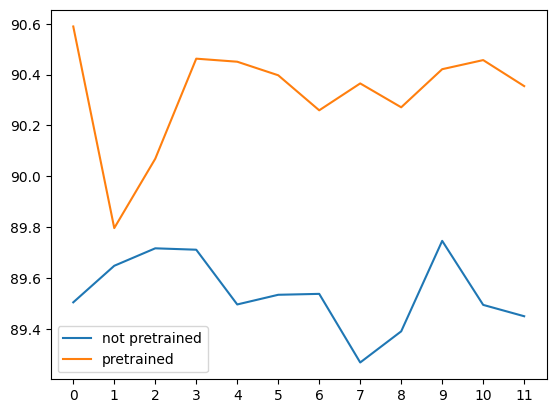

Dataset: it_1 - Features: firstrun_dur


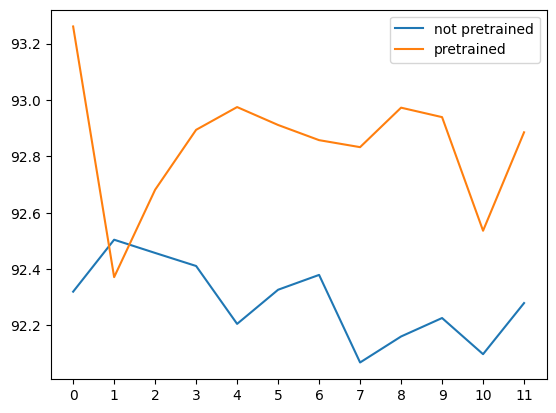

Dataset: it_1 - Features: dur


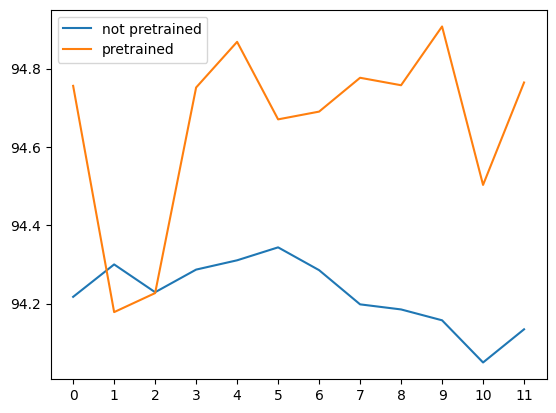

Dataset: it_1 - Features: firstrun_nfix


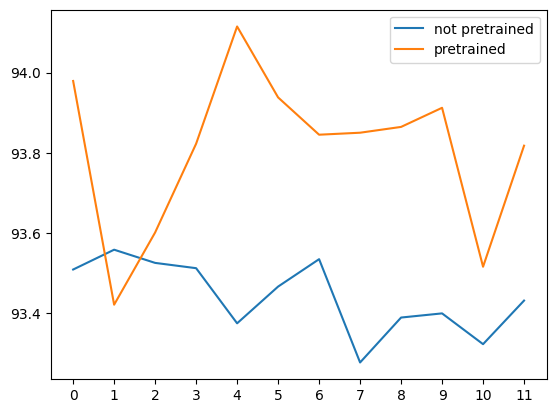

Dataset: it_1 - Features: nfix


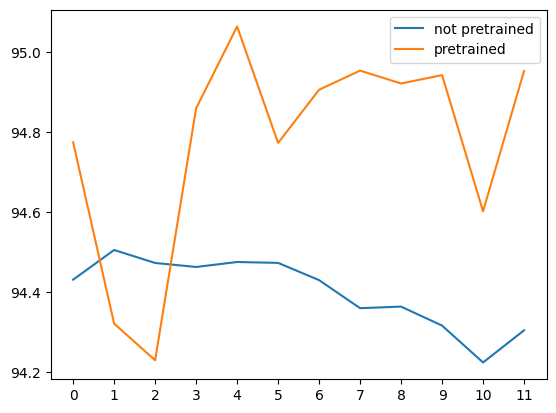

Dataset: it_1 - Features: refix


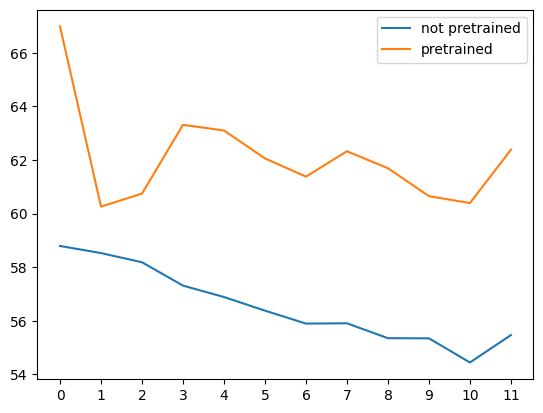

Dataset: it_1 - Features: reread


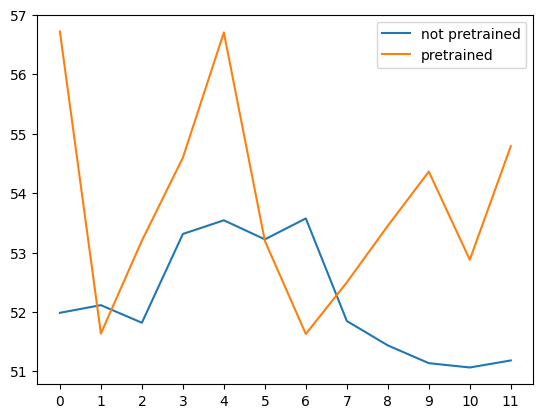

Dataset: it_38 - Features: skip


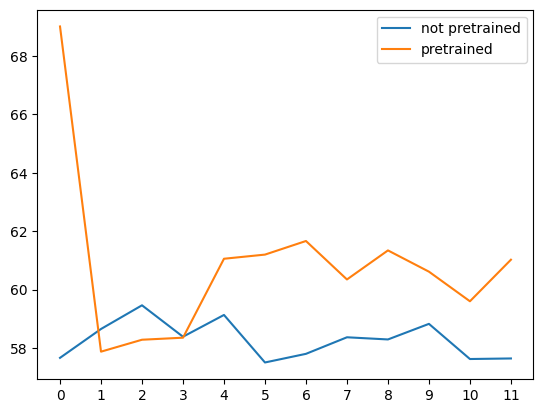

Dataset: it_38 - Features: firstfix_dur


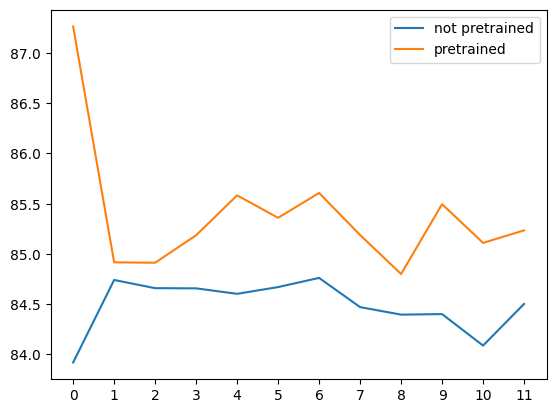

Dataset: it_38 - Features: firstrun_dur


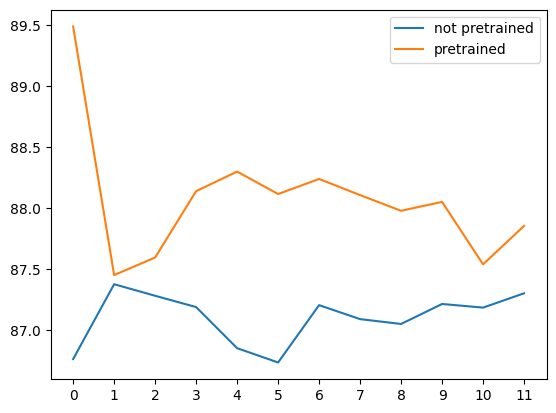

Dataset: it_38 - Features: dur


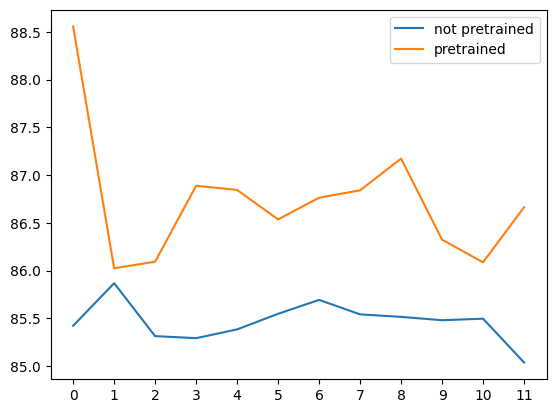

Dataset: it_38 - Features: firstrun_nfix


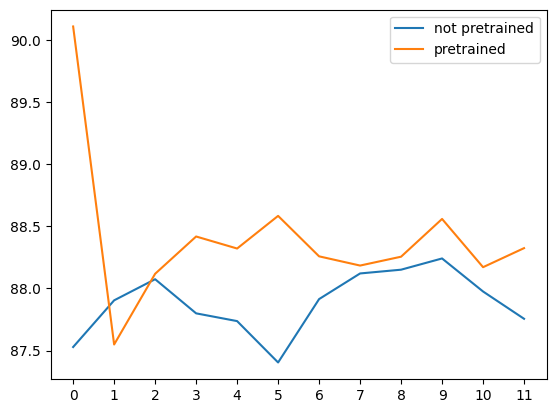

Dataset: it_38 - Features: nfix


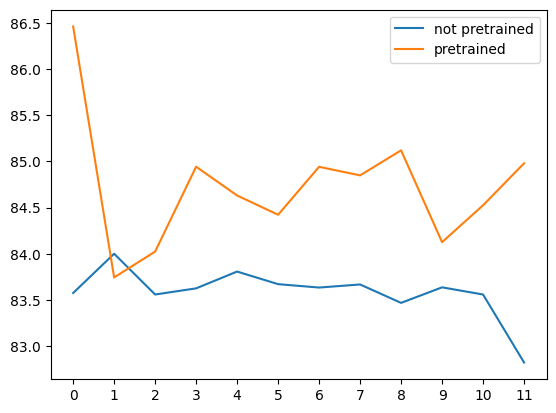

Dataset: it_38 - Features: refix


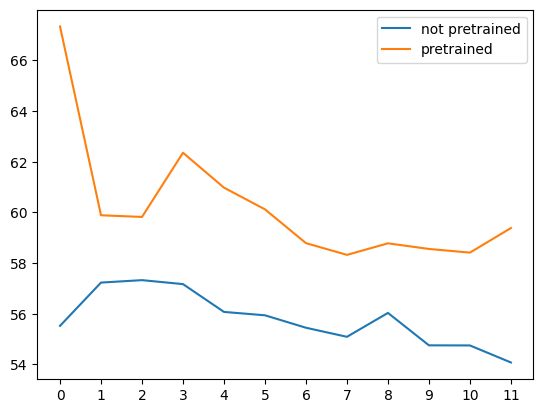

Dataset: it_38 - Features: reread


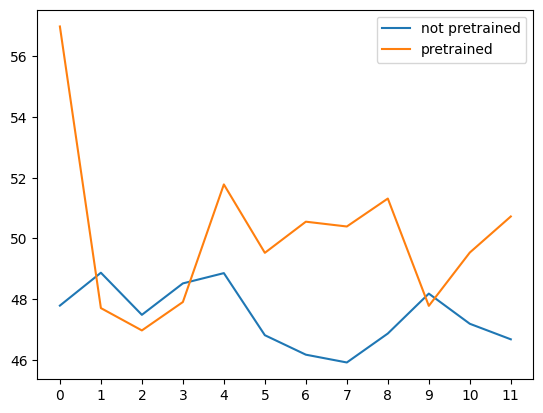

AVERAGED-Dataset: Features: skip


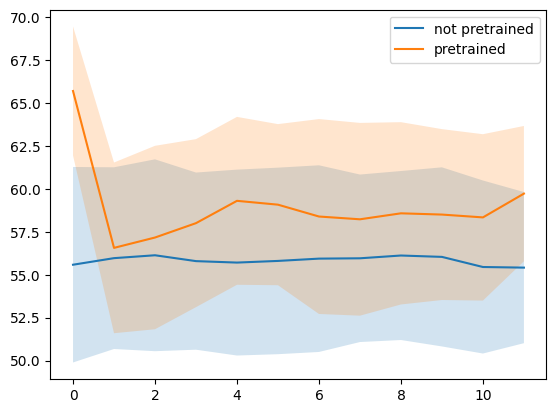

AVERAGED-Dataset: Features: firstfix_dur


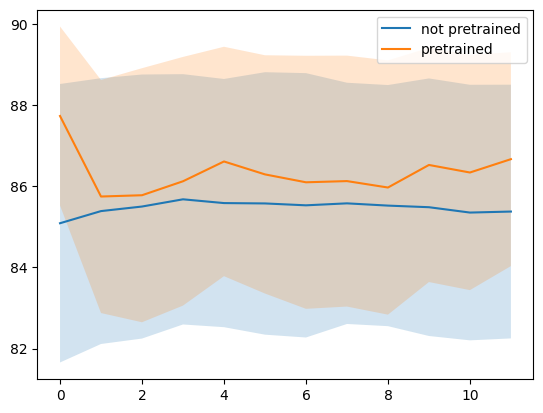

AVERAGED-Dataset: Features: firstrun_dur


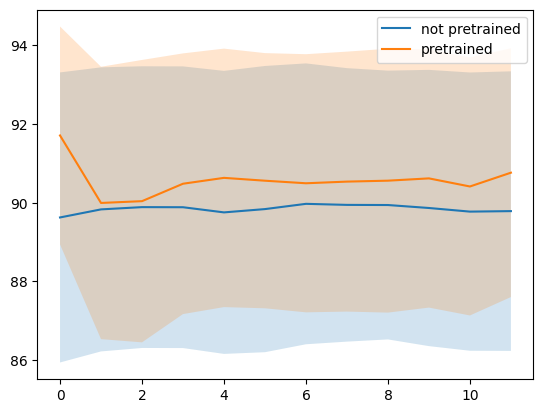

AVERAGED-Dataset: Features: dur


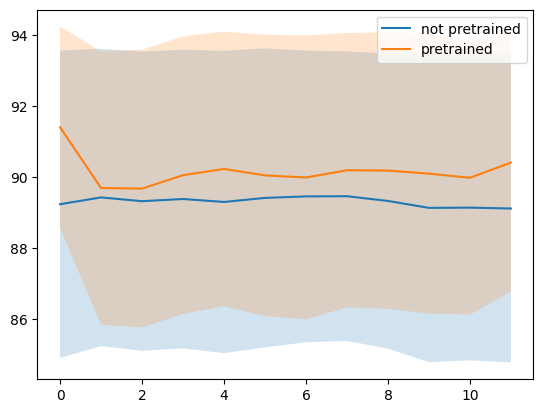

AVERAGED-Dataset: Features: firstrun_nfix


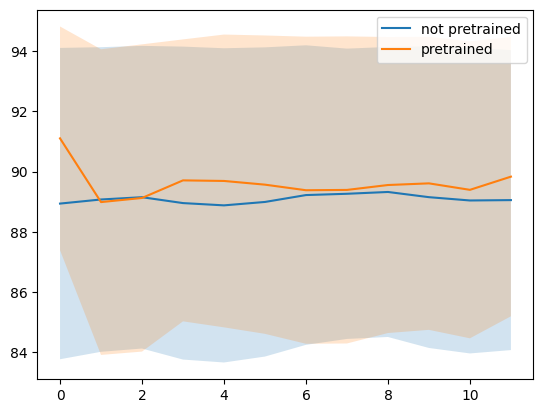

AVERAGED-Dataset: Features: nfix


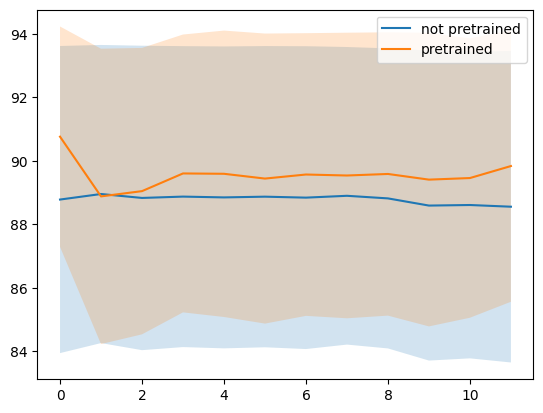

AVERAGED-Dataset: Features: refix


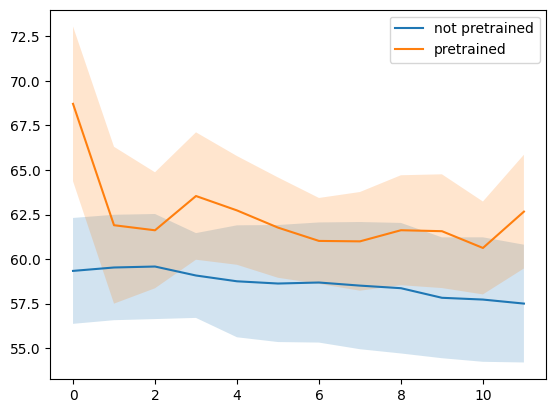

AVERAGED-Dataset: Features: reread


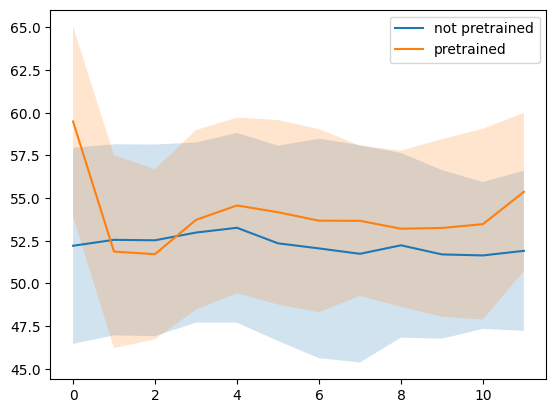

In [8]:
print_probe_results(it_xlm_res)